# Detección de patrones y comportamientos para campaña 2017 

La tienda online Ice vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Identificaremos patrones que determinen si un juego tiene éxito o no. Esto nos permitirá detectar proyectos prometedores y planificar campañas publicitarias. Nos entregaron datos que se remontan a 2016. La compañía está planeando una campaña para 2017.

El dataset contiene la abreviatura ESRB que corresponde a "The Entertainment Software Rating Board" (la Junta de clasificación de software de entretenimiento) evaluaremos el contenido de un juego y asignaremos una clasificación de edad como Adolescente o Adulto.

Para lograr nuestros objetivos, vamos a preparar los datos recibidos y luego analizarlos con el fin de crear un perfil de usuario para cada una de las regiones relevantes (Norte America, la Unión Europea y Japón). Además, buscaremos responder a las siguientes hipótesis:

1. Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
2. Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

# Contenido <a id='back'></a>

* [1 Inicialización](#inicio)
    * [1.1 Cargar datos](#carga_datos)
    * [1.2 Explorar datos iniciales](#explorar_datos)
    * [1.3 Reemplazar los nombres de las columnas](#reemplazar_nombres)
    * [1.4 Revisión de los valores ausentes](#valores_ausentes)
        * [1.4.1 La columna: name](#valores_ausentes_name)
        * [1.4.2 La columna: year_of_release](#valores_ausentes_release)
        * [1.4.3 La columna: critic_score](#valores_ausentes_critic)
        * [1.4.4 La columna: user_score](#valores_ausentes_user)
        * [1.4.5 La columna: rating](#valores_ausentes_rating)
    * [1.5 Convertir las columnas en los tipos correctos](#convertir_datos)
    * [1.6 Crear la columna Ventas Totales](#crear_totales)
* [2 Analisis de datos](#analisis_datos)
    * [2.1 Juegos estrenados por año](#juegos_anuales)
    * [2.2 Ventas por Plataformas](#ventas_plataforma)
    * [2.3 Ventas por Plataformas en base acotada](#ventas_plataforma_2)
        * [2.3.1 Conclusiones sobre las ventas por Plataformas](#ventas_plataforma_conclusiones)
    * [2.4 Reseñas de los usuarios](#estudio_reseñas)
    * [2.5 Rentabilidad por Género](#estudio_generos)
* [3 Perfil de usuario por región](#estudio_perfil)
     * [3.1 Perfil de Norte America](#estudio_perfil_NA)
     * [3.2 Perfil de Europa](#estudio_perfil_EU)
     * [3.3 Perfil de Japón](#estudio_perfil_JP)     
* [4 Comprobación de Hipotesis](#hipotesis)     
     * [4.1 Hipótesis I](#comprobación_hipotesis_1)
     * [4.2 Hipótesis II](#comprobación_hipotesis_2)
* [5 Conclusión general](#conclusion)


## Inicialización <a id='inicio'></a>

Con el fin de resolver nuestras dudas cargaremos las siguientes librerías:
- Pandas
- Matplotlib
- numpy
- scipy.stats
- seaborn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind

### Cargas de datos: <a id='carga_datos'></a>

Recibimos el archivo *games.csv* que cargaremos a continuación:

In [ ]:
games = pd.read_csv('/datasets/games.csv')

### Explorar datos iniciales <a id='explorar_datos'></a>

La tabla games contiene los siguientes datos:

- Name: Nombre
- Platform: Plataforma
- Year_of_Release: Año de lanzamiento
- Genre: Género
- NA_sales: ventas en Norteamérica en millones de dólares estadounidenses
- EU_sales: ventas en Europa en millones de dólares estadounidenses
- JP_sales: ventas en Japón en millones de dólares estadounidenses
- Other_sales: ventas en otros países en millones de dólares estadounidenses
- Critic_Score: máximo de 100
- User_Score: máximo de 10
- Clasificación: ESRB - The Entertainment Software Rating Board

In [ ]:
print('Presentación de las columnas de games:')
print(games.columns)
print()
print('Revisión del número de líneas de games:')
print(len(games), 'líneas.')

Presentación de las columnas de games:
Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Revisión del número de líneas de games:
16715 líneas.


In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [ ]:
games.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


El dataset *games* consta de 11 columnas y 16715 líneas. Las columnas tienen carácteres en mayúscula, pasaremos todos los nombres a minúscula. Podemos notar que las columnas 'name', 'year_of_release', 'genre', 'critic_score', 'user_score' y 'rating' tienen valores ausentes que deben ser analizados. Además, hay que revisar el tipo para las columnas 'year_of_release', 'critic_score', 'user_score' y 'rating'.

Para preparar los datos entonces, vamos a reemplazar los nombres de las columnas, convertir las mismas en los tipos correctos y revisar sus valores ausentes.

### Reemplazar los nombres de las columnas <a id='reemplazar_nombres'></a>

Transformaremos los nombres de las columnas a mínusculas.

In [ ]:
games.columns = games.columns.str.lower()

Validación:

In [ ]:
games.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Revisión de los valores ausentes <a id='valores_ausentes'></a>

Antes de revisar los tipos de datos, debemos analizar los valores ausentes de las columnas siguientes: 'name', 'year_of_release', 'genre', 'critic_score', 'user_score' y 'rating'

#### La columna: name <a id='valores_ausentes_name'></a>

In [ ]:
print('El número de filas con datos ausentes en la columna "name" es:', games['name'].isna().sum())

El número de filas con datos ausentes en la columna "name" es: 2


In [ ]:
games[games['name'].fillna('x') == 'x']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [ ]:
print('Porcentaje de valores ausentes en la columna name:', games['name'].isna().sum()*100/len(games['platform']))

Porcentaje de valores ausentes en la columna name: 0.011965300628178284


Como podemos apreciar, en la columna 'name' tenemos dos valores ausentes, esto corresponde al 0.012% del total de datos en nuestra base. Para estas dos líneas solo tenemos el año en que salió el juego y las ventas, pero nos falta también el genre y los ratings. Para esta columna lo mejor es simplemente eliminar estas líneas ya que no influirá mayormente en el estudio.

In [ ]:
games = games.dropna(subset=['name'])

Validación:

In [ ]:
print('El número de filas con datos ausentes en la columna "name" ahora es:', games['name'].isna().sum())

El número de filas con datos ausentes en la columna "name" ahora es: 0


#### La columna: year_of_release <a id='valores_ausentes_release'></a>

In [ ]:
print('El número de filas con datos ausentes en la columna "year_of_release" es:', games['year_of_release'].isna().sum())

El número de filas con datos ausentes en la columna "year_of_release" es: 269


Analizaremos la tabla filtrada con valores ausentes en la 'columna year_of_release':

In [ ]:
release_filtered_nan = games[games['year_of_release'].fillna('x') == 'x']
release_filtered_nan

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Lo primero que podemos notar es que el nombre del juego a veces indica un año (normalmente es el año siguiente), una alternativa a investigar es ver si tenemos el juego repetido en distintas plataformas:

In [ ]:
games.query('name == "Madden NFL 2004"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1881,Madden NFL 2004,XB,2003.0,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3889,Madden NFL 2004,GC,2003.0,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5708,Madden NFL 2004,GBA,2003.0,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E


In [ ]:
games.query('name == "Space Invaders"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
4264,Space Invaders,SNES,1994.0,Shooter,0.00,0.00,0.46,0.00,NaN,NaN,NaN
8580,Space Invaders,N64,1999.0,Shooter,0.13,0.03,0.00,0.00,NaN,NaN,NaN
10383,Space Invaders,GBA,2002.0,Shooter,0.08,0.03,0.00,0.00,NaN,NaN,NaN


Efectivamente, hay juegos que siguen el patrón deseado. Los nombres se repiten y salieron para distintas plataformas en el mismo año, como el ejemplo de 'Madden NFL 2004'. Pero por otro lado, tenemos juegos como 'Space Invaders' que salieron a la venta en años distintos para las distintas plataformas. En este caso es mejor entonces no utilizar este método de imputación, ya que los datos podrían ser corrompidos.

Vamos a analizar los nombres que contienen el año incluido:

In [ ]:
names_with_year = games[games['name'].str.contains('20')]
names_with_year[names_with_year['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
1650,NASCAR Thunder 2003,PS2,NaN,Racing,0.60,0.46,0.00,0.16,84.0,8.7,E
2492,MLB SlugFest 20-03,PS2,NaN,Sports,0.41,0.32,0.00,0.11,77.0,8.2,E
2572,PES 2009: Pro Evolution Soccer,PSP,NaN,Sports,0.04,0.33,0.26,0.17,NaN,NaN,NaN
3486,Madden NFL 2002,XB,NaN,Sports,0.53,0.02,0.00,0.03,90.0,8.1,E
4775,NFL GameDay 2003,PS2,NaN,Sports,0.20,0.15,0.00,0.05,60.0,tbd,E
5156,NBA Live 2003,XB,NaN,Sports,0.31,0.04,0.00,0.01,82.0,8.8,E
5336,Tomb Raider (2013),PC,NaN,Action,0.06,0.25,0.00,0.04,86.0,8.5,M


In [ ]:
games.loc[183, 'year_of_release'] = 2003
games.loc[377, 'year_of_release'] = 2003
games.loc[475, 'year_of_release'] = 2005
games.loc[1650, 'year_of_release'] = 2002
games.loc[2492, 'year_of_release'] = 2002
games.loc[2572, 'year_of_release'] = 2008
games.loc[3486, 'year_of_release'] = 2001
games.loc[4775, 'year_of_release'] = 2002
games.loc[5156, 'year_of_release'] = 2002
games.loc[5336, 'year_of_release'] = 2012
games.loc[5655, 'year_of_release'] = 2004
games.loc[5889, 'year_of_release'] = 2002
games.loc[6954, 'year_of_release'] = 2002
games.loc[8918, 'year_of_release'] = 2004
games.loc[13195, 'year_of_release'] = 2010
games.loc[13929, 'year_of_release'] = 2005
games.loc[15953, 'year_of_release'] = 2007
games.loc[16079, 'year_of_release'] = 2006
games.loc[16373, 'year_of_release'] = 2007

In [ ]:
games[games['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
...,...,...,...,...,...,...,...,...,...,...,...
16348,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Nos quedan 250 valores ausentes en la columna 'year_of_release', esto equivale a un 0.7% de nuestra base. Completaremos los valores ausentes por consola de manera manual:

In [ ]:
games[(games['year_of_release'].isna()) & (games['platform'] == '2600')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.0,0.03,NaN,NaN,NaN
1506,Adventure,2600,NaN,Adventure,1.21,0.08,0.0,0.01,NaN,NaN,NaN
1585,Combat,2600,NaN,Action,1.17,0.07,0.0,0.01,NaN,NaN,NaN
2106,Air-Sea Battle,2600,NaN,Shooter,0.91,0.06,0.0,0.01,NaN,NaN,NaN
3883,Fishing Derby,2600,NaN,Sports,0.48,0.03,0.0,0.01,NaN,NaN,NaN
4132,Karate,2600,NaN,Fighting,0.44,0.03,0.0,0.00,NaN,NaN,NaN
4220,Circus Atari,2600,NaN,Action,0.43,0.03,0.0,0.00,NaN,NaN,NaN
4337,Maze Craze: A Game of Cops 'n Robbers,2600,NaN,Action,0.42,0.02,0.0,0.00,NaN,NaN,NaN
4437,Super Breakout,2600,NaN,Puzzle,0.41,0.03,0.0,0.00,NaN,NaN,NaN
5041,Hangman,2600,NaN,Puzzle,0.35,0.02,0.0,0.00,NaN,NaN,NaN


In [ ]:
games.loc[609, 'year_of_release'] = 1978
games.loc[1506, 'year_of_release'] = 1980
games.loc[1585, 'year_of_release'] = 1977
games.loc[2106, 'year_of_release'] = 1977
games.loc[3883, 'year_of_release'] = 1980
games.loc[4132, 'year_of_release'] = 1982
games.loc[4220, 'year_of_release'] = 1980
games.loc[4337, 'year_of_release'] = 1980
games.loc[4437, 'year_of_release'] = 1978
games.loc[5041, 'year_of_release'] = 1978
games.loc[5642, 'year_of_release'] = 1980
games.loc[5800, 'year_of_release'] = 1979
games.loc[6266, 'year_of_release'] = 1977
games.loc[6299, 'year_of_release'] = 1978
games.loc[7353, 'year_of_release'] = 1989
games.loc[7354, 'year_of_release'] = 1978
games.loc[8740, 'year_of_release'] = 1978

In [ ]:
games[(games['year_of_release'].isna()) & (games['platform'] == '3DS')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
4818,LEGO Harry Potter: Years 5-7,3DS,NaN,Action,0.18,0.19,0.00,0.03,71.0,6.5,E10+
5874,Harvest Moon: The Tale of Two Towns,3DS,NaN,Simulation,0.28,0.00,0.00,0.02,NaN,NaN,NaN
7848,Pet Zombies,3DS,NaN,Simulation,0.18,0.00,0.00,0.01,NaN,tbd,T
11377,Face Racers: Photo Finish,3DS,NaN,Racing,0.08,0.00,0.00,0.01,NaN,tbd,E
11455,The Hidden,3DS,NaN,Adventure,0.08,0.00,0.00,0.01,NaN,4.2,E10+
11943,Dream Trigger 3D,3DS,NaN,Shooter,0.04,0.02,0.00,0.01,54.0,6.3,E
14325,Beyond the Labyrinth,3DS,NaN,Role-Playing,0.00,0.00,0.03,0.00,NaN,NaN,NaN
15338,Mario Tennis,3DS,NaN,Sports,0.00,0.00,0.02,0.00,NaN,NaN,NaN


In [ ]:
games.loc[4818, 'year_of_release'] = 2011
games.loc[5874, 'year_of_release'] = 2010
games.loc[7848, 'year_of_release'] = 2011
games.loc[11377, 'year_of_release'] = 2011
games.loc[11455, 'year_of_release'] = 2011
games.loc[11943, 'year_of_release'] = 2011
games.loc[14325, 'year_of_release'] = 2012
games.loc[15338, 'year_of_release'] = 2000

In [ ]:
games[(games['year_of_release'].isna()) & (games['platform'] == 'GB')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2010,Donkey Kong Land III,GB,NaN,Platform,0.68,0.31,0.0,0.04,NaN,NaN,NaN


In [ ]:
games.loc[2010, 'year_of_release'] = 1997

In [ ]:
games[(games['year_of_release'].isna()) & (games['platform'] == 'GC')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
3739,NBA Street Vol. 2,GC,NaN,Sports,0.41,0.11,0.00,0.01,88.0,8.1,E
6019,Nicktoons: Battle for Volcano Island,GC,NaN,Action,0.22,0.06,0.00,0.01,NaN,7,E
6180,"The Chronicles of Narnia: The Lion, The Witch ...",GC,NaN,Action,0.22,0.06,0.00,0.01,71.0,tbd,T
6199,Pac-Man Fever,GC,NaN,Misc,0.21,0.06,0.00,0.01,54.0,6.3,E
9516,Nintendo Puzzle Collection,GC,NaN,Puzzle,0.00,0.00,0.13,0.00,NaN,NaN,NaN
9817,Street Hoops,GC,NaN,Sports,0.09,0.02,0.00,0.00,56.0,7.3,T
10258,GiFTPiA,GC,NaN,Role-Playing,0.00,0.00,0.11,0.00,NaN,NaN,NaN
11832,Smashing Drive,GC,NaN,Racing,0.06,0.01,0.00,0.00,47.0,5.2,T
13792,NHL Hitz Pro,GC,NaN,Sports,0.03,0.01,0.00,0.00,81.0,7.8,E
15006,Tube Slider,GC,NaN,Racing,0.02,0.00,0.00,0.00,62.0,tbd,E


In [ ]:
games.loc[3739, 'year_of_release'] = 2003
games.loc[6019, 'year_of_release'] = 2006
games.loc[6180, 'year_of_release'] = 2005
games.loc[6199, 'year_of_release'] = 2002
games.loc[9516, 'year_of_release'] = 2003
games.loc[9817, 'year_of_release'] = 2002
games.loc[10258, 'year_of_release'] = 2003
games.loc[11832, 'year_of_release'] = 2000
games.loc[13792, 'year_of_release'] = 2003
games.loc[15006, 'year_of_release'] = 2003
games.loc[15966, 'year_of_release'] = 2003
games.loc[16405, 'year_of_release'] = 2003
games.loc[16522, 'year_of_release'] = 2004

In [ ]:
games[(games['year_of_release'].isna()) & (games['platform'] == 'N64')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
5492,Custom Robo,N64,NaN,Role-Playing,0.00,0.00,0.29,0.04,NaN,NaN,NaN
7605,Famista 64,N64,NaN,Sports,0.00,0.00,0.17,0.03,NaN,NaN,NaN
9151,WCW Backstage Assault,N64,NaN,Action,0.11,0.03,0.00,0.00,NaN,NaN,NaN


In [ ]:
games.loc[5492, 'year_of_release'] = 1999
games.loc[7605, 'year_of_release'] = 1997
games.loc[9151, 'year_of_release'] = 2000

In [ ]:
games[(games['year_of_release'].isna()) & (games['platform'] == 'PSV')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
6293,Disgaea 3: Absence of Detention,PSV,NaN,Role-Playing,0.11,0.05,0.07,0.03,78.0,7.6,T


In [ ]:
games.loc[6293, 'year_of_release'] = 2008

In [ ]:
games[(games['year_of_release'].isna()) & (games['platform'] == 'DS')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
3081,LEGO Harry Potter: Years 5-7,DS,NaN,Action,0.34,0.25,0.00,0.07,69.0,tbd,E10+
3289,Advance Wars: Days of Ruin,DS,NaN,Strategy,0.43,0.12,0.00,0.05,86.0,8.7,E10+
5443,Bejeweled 3,DS,NaN,Puzzle,0.29,0.02,0.00,0.02,75.0,tbd,E
5932,Shrek the Third,DS,NaN,Action,0.26,0.01,0.00,0.02,70.0,6.5,E
9664,Charm Girls Club: My Fashion Mall,DS,NaN,Simulation,0.12,0.00,0.00,0.01,NaN,tbd,E
9855,The Daring Game for Girls,DS,NaN,Adventure,0.11,0.00,0.00,0.01,NaN,tbd,E
10486,Atsumare! Power Pro Kun no DS Koushien,DS,NaN,Sports,0.00,0.00,0.10,0.00,NaN,NaN,NaN
10612,My Healthy Cooking Coach,DS,NaN,Simulation,0.09,0.00,0.00,0.01,NaN,tbd,E
10686,Happy Feet Two,DS,NaN,Action,0.08,0.01,0.00,0.01,NaN,tbd,E
10764,Luminous Arc 2 (JP sales),DS,NaN,Role-Playing,0.00,0.00,0.10,0.00,NaN,NaN,NaN


In [ ]:
games.loc[3081, 'year_of_release'] = 2011
games.loc[3289, 'year_of_release'] = 2008
games.loc[5443, 'year_of_release'] = 2011
games.loc[5932, 'year_of_release'] = 2007
games.loc[9664, 'year_of_release'] = 2009
games.loc[9855, 'year_of_release'] = 2010
games.loc[10486, 'year_of_release'] = 2006
games.loc[10612, 'year_of_release'] = 2008
games.loc[10686, 'year_of_release'] = 2011
games.loc[10764, 'year_of_release'] = 2008
games.loc[10837, 'year_of_release'] = 2005
games.loc[11338, 'year_of_release'] = 2009
games.loc[11790, 'year_of_release'] = 2009
games.loc[12003, 'year_of_release'] = 2008
games.loc[12241, 'year_of_release'] = 2006
games.loc[12524, 'year_of_release'] = 2006
games.loc[12880, 'year_of_release'] = 2012
games.loc[13060, 'year_of_release'] = 2011
games.loc[13142, 'year_of_release'] = 2008
games.loc[14126, 'year_of_release'] = 2007
games.loc[14350, 'year_of_release'] = 2007
games.loc[15119, 'year_of_release'] = 2009
games.loc[15292, 'year_of_release'] = 2008
games.loc[15535, 'year_of_release'] = 2009
games.loc[15704, 'year_of_release'] = 2008
games.loc[15795, 'year_of_release'] = 2007
games.loc[15998, 'year_of_release'] = 2007
games.loc[16017, 'year_of_release'] = 2009
games.loc[16288, 'year_of_release'] = 2009

In [ ]:
games[(games['year_of_release'].isna()) & (games['platform'] == 'GBA')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
2773,WarioWare: Twisted!,GBA,NaN,Puzzle,0.16,0.06,0.50,0.02,NaN,NaN,NaN
3024,"The Chronicles of Narnia: The Lion, The Witch ...",GBA,NaN,Action,0.48,0.18,0.00,0.01,66.0,6.8,E
5194,Cubix Robots for Everyone: Clash 'n' Bash,GBA,NaN,Action,0.26,0.10,0.00,0.01,NaN,NaN,NaN
6255,The Legend of Zelda: The Minish Cap(weekly JP ...,GBA,NaN,Action,0.00,0.00,0.27,0.01,NaN,NaN,NaN
8212,Teen Titans,GBA,NaN,Action,0.13,0.05,0.00,0.00,61.0,tbd,E10+
9293,Disney's Cinderella: Magical Dreams,GBA,NaN,Platform,0.10,0.04,0.00,0.00,69.0,tbd,E
11119,Super Puzzle Fighter II,GBA,NaN,Puzzle,0.06,0.02,0.00,0.00,83.0,9.5,E
12970,Drill Dozer,GBA,NaN,Platform,0.04,0.01,0.00,0.00,81.0,8.3,E
14210,Sabre Wulf,GBA,NaN,Platform,0.02,0.01,0.00,0.00,75.0,8,E


In [ ]:
games.loc[657, 'year_of_release'] = 2001
games.loc[2773, 'year_of_release'] = 2004
games.loc[3024, 'year_of_release'] = 2004
games.loc[5194, 'year_of_release'] = 2002
games.loc[6255, 'year_of_release'] = 2004
games.loc[8212, 'year_of_release'] = 2005
games.loc[9293, 'year_of_release'] = 2005
games.loc[11119, 'year_of_release'] = 1996
games.loc[12970, 'year_of_release'] = 2005
games.loc[14210, 'year_of_release'] = 2004
games.loc[14769, 'year_of_release'] = 2003

In [ ]:
games[(games['year_of_release'].isna()) & (games['platform'] == 'PC')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1131,Call of Duty: Black Ops,PC,NaN,Shooter,0.58,0.81,0.0,0.23,81.0,5.2,M
4648,TERA,PC,NaN,Role-Playing,0.25,0.12,0.0,0.05,77.0,6.8,M
6818,BioShock 2,PC,NaN,Shooter,0.02,0.19,0.0,0.04,88.0,8,M
7210,LEGO Harry Potter: Years 5-7,PC,NaN,Action,0.05,0.14,0.0,0.03,80.0,8.5,E10+
7724,Dead Space 3,PC,NaN,Action,0.02,0.16,0.0,0.02,78.0,6,M
7735,Test Drive Unlimited 2,PC,NaN,Racing,0.05,0.11,0.0,0.03,72.0,5.7,T
9485,Street Fighter IV,PC,NaN,Fighting,0.07,0.05,0.0,0.02,91.0,8,T
9706,Rocksmith,PC,NaN,Misc,0.06,0.04,0.0,0.01,78.0,8.1,T
11954,Dead Island: Riptide,PC,NaN,Action,0.00,0.07,0.0,0.01,61.0,6,M
13564,RollerCoaster Tycoon,PC,NaN,Strategy,0.02,0.02,0.0,0.01,NaN,NaN,E


In [ ]:
games.loc[1131, 'year_of_release'] = 2010
games.loc[4648, 'year_of_release'] = 2011
games.loc[6818, 'year_of_release'] = 2010
games.loc[7210, 'year_of_release'] = 2011
games.loc[7724, 'year_of_release'] = 2013
games.loc[7735, 'year_of_release'] = 2011
games.loc[9485, 'year_of_release'] = 2008
games.loc[9706, 'year_of_release'] = 2011
games.loc[11954, 'year_of_release'] = 2013
games.loc[13564, 'year_of_release'] = 2018
games.loc[13672, 'year_of_release'] = 2016
games.loc[13781, 'year_of_release'] = 2008
games.loc[14746, 'year_of_release'] = 2011
games.loc[16180, 'year_of_release'] = 2010
games.loc[16277, 'year_of_release'] = 2015
games.loc[16448, 'year_of_release'] = 2012

In [ ]:
games[(games['year_of_release'].isna()) & (games['platform'] == 'PS')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1301,Triple Play 99,PS,NaN,Sports,0.81,0.55,0.00,0.10,NaN,NaN,NaN
1984,Legacy of Kain: Soul Reaver,PS,NaN,Action,0.58,0.40,0.00,0.07,91.0,9,T
5857,The Dukes of Hazzard II: Daisy Dukes It Out,PS,NaN,Racing,0.17,0.11,0.00,0.02,53.0,tbd,E
8150,Twisted Metal: Small Brawl,PS,NaN,Action,0.10,0.07,0.00,0.01,51.0,7.6,T
8547,Alone in the Dark: The New Nightmare,PS,NaN,Adventure,0.09,0.06,0.00,0.01,77.0,8.1,M
11092,Action Man-Operation Extreme,PS,NaN,Action,0.05,0.03,0.00,0.01,NaN,NaN,NaN
13711,B.L.U.E.: Legend of Water,PS,NaN,Adventure,0.00,0.00,0.04,0.00,NaN,NaN,NaN


In [ ]:
games.loc[1301, 'year_of_release'] = 1998
games.loc[1984, 'year_of_release'] = 1999
games.loc[5857, 'year_of_release'] = 2000
games.loc[8150, 'year_of_release'] = 2001
games.loc[8547, 'year_of_release'] = 2001
games.loc[11092, 'year_of_release'] = 2000
games.loc[13711, 'year_of_release'] = 1998

In [ ]:
games[(games['year_of_release'].isna()) & (games['platform'] == 'PS2')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1840,Rock Band,PS2,NaN,Misc,0.71,0.06,0.00,0.35,82.0,6.8,T
2108,Suikoden III,PS2,NaN,Role-Playing,0.29,0.23,0.38,0.08,86.0,7.7,T
2157,Wheel of Fortune,PS2,NaN,Misc,0.47,0.36,0.00,0.12,NaN,tbd,E
3187,Monster Hunter 2,PS2,NaN,Role-Playing,0.00,0.00,0.63,0.00,NaN,NaN,NaN
3459,NASCAR: Dirt to Daytona,PS2,NaN,Racing,0.28,0.22,0.00,0.07,84.0,8.8,E
4848,Harvest Moon: Save the Homeland,PS2,NaN,Simulation,0.19,0.15,0.00,0.05,76.0,8.8,E
5588,Final Fantasy XI,PS2,NaN,Role-Playing,0.08,0.06,0.15,0.02,85.0,6.9,T
6101,Haven: Call of the King,PS2,NaN,Platform,0.14,0.11,0.00,0.04,69.0,6.9,T
6624,College Hoops 2K6,PS2,NaN,Sports,0.12,0.10,0.00,0.03,77.0,7.3,E
6773,Mega Man X Collection,PS2,NaN,Misc,0.12,0.09,0.00,0.03,73.0,8.8,E


In [ ]:
games.loc[1840, 'year_of_release'] = 2007
games.loc[2108, 'year_of_release'] = 2002
games.loc[2157, 'year_of_release'] = 2000
games.loc[3187, 'year_of_release'] = 2006
games.loc[3459, 'year_of_release'] = 2002
games.loc[4848, 'year_of_release'] = 2001
games.loc[5588, 'year_of_release'] = 2002
games.loc[6101, 'year_of_release'] = 2002
games.loc[6624, 'year_of_release'] = 2005
games.loc[6773, 'year_of_release'] = 2006
games.loc[7008, 'year_of_release'] = 2002
games.loc[7332, 'year_of_release'] = 2004
games.loc[8197, 'year_of_release'] = 2002
games.loc[8319, 'year_of_release'] = 2002
games.loc[8364, 'year_of_release'] = 2003
games.loc[8884, 'year_of_release'] = 2003
games.loc[9761, 'year_of_release'] = 2006
games.loc[10050, 'year_of_release'] = 2007
games.loc[11000, 'year_of_release'] = 2005
games.loc[12011, 'year_of_release'] = 2004
games.loc[12584, 'year_of_release'] = 2005
games.loc[12959, 'year_of_release'] = 2007
games.loc[14597, 'year_of_release'] = 2005
games.loc[15675, 'year_of_release'] = 2006
games.loc[15754, 'year_of_release'] = 2004

In [ ]:
games[(games['year_of_release'].isna()) & (games['platform'] == 'PS3')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1142,Rock Band,PS3,NaN,Misc,0.99,0.41,0.00,0.22,92.0,8.4,T
2169,Yakuza 4,PS3,NaN,Action,0.15,0.13,0.63,0.05,78.0,8,M
2273,LEGO Harry Potter: Years 5-7,PS3,NaN,Action,0.36,0.41,0.00,0.15,76.0,8.3,E10+
2522,The Lord of the Rings: War in the North,PS3,NaN,Action,0.25,0.42,0.01,0.13,63.0,7,M
3233,Test Drive Unlimited 2,PS3,NaN,Racing,0.16,0.34,0.01,0.12,70.0,6.1,T
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+
4945,Robert Ludlum's The Bourne Conspiracy,PS3,NaN,Action,0.18,0.14,0.00,0.06,70.0,7.6,T
4959,Silent Hill: Homecoming,PS3,NaN,Action,0.18,0.14,0.00,0.06,71.0,6.9,M
6356,Rock Revolution,PS3,NaN,Misc,0.25,0.00,0.00,0.02,42.0,6.6,T
6636,Jonah Lomu Rugby Challenge,PS3,NaN,Sports,0.00,0.19,0.00,0.06,64.0,NaN,E


In [ ]:
games.loc[1142, 'year_of_release'] = 2007
games.loc[2169, 'year_of_release'] = 2010
games.loc[2273, 'year_of_release'] = 2011
games.loc[2522, 'year_of_release'] = 2011
games.loc[3233, 'year_of_release'] = 2011
games.loc[4127, 'year_of_release'] = 2006
games.loc[4945, 'year_of_release'] = 2008
games.loc[4959, 'year_of_release'] = 2008
games.loc[6356, 'year_of_release'] = 2008
games.loc[6636, 'year_of_release'] = 2011
games.loc[6861, 'year_of_release'] = 2010
games.loc[7387, 'year_of_release'] = 2013
games.loc[7584, 'year_of_release'] = 2010
games.loc[8260, 'year_of_release'] = 2009
games.loc[8500, 'year_of_release'] = 2010
games.loc[9043, 'year_of_release'] = 2011
games.loc[9703, 'year_of_release'] = 2009
games.loc[10317, 'year_of_release'] = 2011
games.loc[11925, 'year_of_release'] = 2012
games.loc[13317, 'year_of_release'] = 2007
games.loc[13609, 'year_of_release'] = 2011
games.loc[13647, 'year_of_release'] = 2010
games.loc[15022, 'year_of_release'] = 2011
games.loc[16348, 'year_of_release'] = 2007
games.loc[16458, 'year_of_release'] = 2013

In [ ]:
games[(games['year_of_release'].isna()) & (games['platform'] == 'PSP')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1538,LEGO Batman: The Videogame,PSP,NaN,Action,0.57,0.44,0.00,0.27,73.0,7.4,E10+
2479,Madden NFL 07,PSP,NaN,Sports,0.77,0.03,0.00,0.04,78.0,6.6,E
5070,The Golden Compass,PSP,NaN,Action,0.11,0.16,0.00,0.10,28.0,4.1,E10+
6476,LEGO Harry Potter: Years 5-7,PSP,NaN,Action,0.10,0.10,0.00,0.06,NaN,tbd,E10+
6899,Danganronpa: Trigger Happy Havoc,PSP,NaN,Misc,0.00,0.00,0.24,0.00,NaN,NaN,NaN
7391,Valkyria Chronicles III: Unrecorded Chronicles,PSP,NaN,Strategy,0.00,0.00,0.21,0.00,NaN,NaN,NaN
9738,Super Robot Wars OG Saga: Masou Kishin II - Re...,PSP,NaN,Strategy,0.00,0.00,0.12,0.00,NaN,NaN,NaN
9876,Major League Baseball 2K6,PSP,NaN,Sports,0.11,0.00,0.00,0.01,69.0,tbd,E
11016,Samurai Shodown Anthology,PSP,NaN,Fighting,0.08,0.00,0.00,0.01,NaN,tbd,T
12568,Prinny: Can I Really Be The Hero? (US sales),PSP,NaN,Action,0.06,0.00,0.00,0.00,NaN,NaN,NaN


In [ ]:
games.loc[1538, 'year_of_release'] = 2008
games.loc[2479, 'year_of_release'] = 2006
games.loc[5070, 'year_of_release'] = 2007
games.loc[6476, 'year_of_release'] = 2011
games.loc[6899, 'year_of_release'] = 2010
games.loc[7391, 'year_of_release'] = 2011
games.loc[9738, 'year_of_release'] = 2012
games.loc[9876, 'year_of_release'] = 2006
games.loc[11016, 'year_of_release'] = 2008
games.loc[12568, 'year_of_release'] = 2009
games.loc[14105, 'year_of_release'] = 2011
games.loc[14141, 'year_of_release'] = 2008
games.loc[14449, 'year_of_release'] = 2010
games.loc[15079, 'year_of_release'] = 2003

In [ ]:
games[(games['year_of_release'].isna()) & (games['platform'] == 'Wii')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating


In [ ]:
games.loc[456, 'year_of_release'] = 2014
games.loc[678, 'year_of_release'] = 2008
games.loc[719, 'year_of_release'] = 2006
games.loc[805, 'year_of_release'] = 2007
games.loc[1609, 'year_of_release'] = 2011
games.loc[2361, 'year_of_release'] = 2011
games.loc[2849, 'year_of_release'] = 2010
games.loc[3352, 'year_of_release'] = 2007
games.loc[4205, 'year_of_release'] = 2006
games.loc[4635, 'year_of_release'] = 2010
games.loc[5294, 'year_of_release'] = 2007
games.loc[6999, 'year_of_release'] = 2006
games.loc[7108, 'year_of_release'] = 2010
games.loc[7406, 'year_of_release'] = 2011
games.loc[8250, 'year_of_release'] = 2010
games.loc[8632, 'year_of_release'] = 2009
games.loc[9119, 'year_of_release'] = 2009
games.loc[10465, 'year_of_release'] = 2006
games.loc[10993, 'year_of_release'] = 2009
games.loc[11433, 'year_of_release'] = 2008
games.loc[11565, 'year_of_release'] = 2008
games.loc[11622, 'year_of_release'] = 2011
games.loc[12209, 'year_of_release'] = 2007
games.loc[12718, 'year_of_release'] = 2010
games.loc[12896, 'year_of_release'] = 2011
games.loc[13289, 'year_of_release'] = 2010
games.loc[13874, 'year_of_release'] = 2008
games.loc[14252, 'year_of_release'] = 2007
games.loc[14950, 'year_of_release'] = 2012
games.loc[15081, 'year_of_release'] = 2007
games.loc[15267, 'year_of_release'] = 2009
games.loc[15557, 'year_of_release'] = 2009
games.loc[16059, 'year_of_release'] = 2011
games.loc[16080, 'year_of_release'] = 2010

In [ ]:
games[(games['year_of_release'].isna()) & (games['platform'] == 'X360')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
2132,LEGO Harry Potter: Years 5-7,X360,NaN,Action,0.51,0.37,0.00,0.09,77.0,7.9,E10+
2453,The Lord of the Rings: War in the North,X360,NaN,Action,0.52,0.24,0.00,0.08,61.0,7.4,M
2536,Shaun White Snowboarding,X360,NaN,Sports,0.48,0.25,0.00,0.08,60.0,7.6,T
2969,Test Drive Unlimited 2,X360,NaN,Racing,0.30,0.31,0.00,0.07,68.0,6.4,T
3413,Madden NFL 06,X360,NaN,Sports,0.54,0.00,0.01,0.03,74.0,4.9,E
3997,Wet,X360,NaN,Shooter,0.23,0.21,0.01,0.05,69.0,7.3,M
4373,Silent Hill: Homecoming,X360,NaN,Action,0.25,0.15,0.00,0.04,70.0,6.9,M
4445,Robert Ludlum's The Bourne Conspiracy,X360,NaN,Action,0.26,0.13,0.00,0.04,71.0,7.2,T
5326,Tropico 4,X360,NaN,Strategy,0.20,0.12,0.00,0.03,77.0,7.5,T


In [ ]:
games.loc[627, 'year_of_release'] = 2007
games.loc[2132, 'year_of_release'] = 2011
games.loc[2453, 'year_of_release'] = 2011
games.loc[2536, 'year_of_release'] = 2008
games.loc[2969, 'year_of_release'] = 2011
games.loc[3413, 'year_of_release'] = 2005
games.loc[3997, 'year_of_release'] = 2009
games.loc[4373, 'year_of_release'] = 2008
games.loc[4445, 'year_of_release'] = 2008
games.loc[5326, 'year_of_release'] = 2011
games.loc[5624, 'year_of_release'] = 2010
games.loc[6342, 'year_of_release'] = 2005
games.loc[8023, 'year_of_release'] = 2006
games.loc[8067, 'year_of_release'] = 2009
games.loc[8151, 'year_of_release'] = 2011
games.loc[8680, 'year_of_release'] = 2011
games.loc[9218, 'year_of_release'] = 2011
games.loc[9827, 'year_of_release'] = 2010
games.loc[10790, 'year_of_release'] = 2011
games.loc[11550, 'year_of_release'] = 2010
games.loc[11957, 'year_of_release'] = 2011
games.loc[12221, 'year_of_release'] = 2012
games.loc[12235, 'year_of_release'] = 2011
games.loc[12734, 'year_of_release'] = 2008
games.loc[14369, 'year_of_release'] = 2009
games.loc[14685, 'year_of_release'] = 2010
games.loc[16293, 'year_of_release'] = 2011
games.loc[16329, 'year_of_release'] = 2012

In [ ]:
games[(games['year_of_release'].isna()) & (games['platform'] == 'XB')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1699,Hitman 2: Silent Assassin,XB,NaN,Action,0.76,0.38,0.0,0.05,84.0,8,M
2281,Namco Museum,XB,NaN,Misc,0.77,0.11,0.0,0.04,59.0,tbd,E
3223,Metal Gear Solid 2: Substance,XB,NaN,Action,0.38,0.22,0.0,0.03,87.0,8.5,M
3704,Def Jam: Fight for NY,XB,NaN,Fighting,0.43,0.10,0.0,0.02,84.0,8.5,M
4294,The Chronicles of Riddick: Escape from Butcher...,XB,NaN,Shooter,0.32,0.11,0.0,0.02,89.0,8.9,M
5769,Star Wars Jedi Knight II: Jedi Outcast,XB,NaN,Shooter,0.23,0.07,0.0,0.01,81.0,6.8,T
6133,Unreal Championship 2: The Liandri Conflict,XB,NaN,Shooter,0.22,0.05,0.0,0.01,85.0,8.2,M
7367,Robotech: Battlecry,XB,NaN,Shooter,0.16,0.05,0.0,0.01,74.0,7,T
9380,Transworld Surf,XB,NaN,Sports,0.10,0.03,0.0,0.00,76.0,tbd,T
9830,Godzilla: Destroy All Monsters Melee,XB,NaN,Fighting,0.09,0.03,0.0,0.00,71.0,6.8,T


In [ ]:
games.loc[1699, 'year_of_release'] = 2002
games.loc[2281, 'year_of_release'] = 1999
games.loc[3223, 'year_of_release'] = 2002
games.loc[3704, 'year_of_release'] = 2004
games.loc[4294, 'year_of_release'] = 2004
games.loc[5769, 'year_of_release'] = 2002
games.loc[6133, 'year_of_release'] = 2005
games.loc[7367, 'year_of_release'] = 2002
games.loc[9380, 'year_of_release'] = 2001
games.loc[9830, 'year_of_release'] = 2002
games.loc[12046, 'year_of_release'] = 2003
games.loc[12217, 'year_of_release'] = 2001
games.loc[12784, 'year_of_release'] = 2006
games.loc[14546, 'year_of_release'] = 2005
games.loc[14749, 'year_of_release'] = 2002
games.loc[14931, 'year_of_release'] = 2005
games.loc[15816, 'year_of_release'] = 2005
games.loc[16157, 'year_of_release'] = 2003

In [ ]:
games[games['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Ahora que no tenemos más valores ausentes en la columna 'year_of_release'.

In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 2.0+ MB


Ahora no tenemos valores ausentes en nuestra columna 'year_of_release' y estamos seguros de que los años fueron completados correctamente. Esto es indispensable para nuestro estudio.

#### La columna: critic_score <a id='valores_ausentes_critic'></a>

In [ ]:
print('El número de filas con datos ausentes en la columna "critic_score" es:', games['critic_score'].isna().sum())
print()
print('El porcentaje de valores ausentes en la columna "critic_score" es:', games['critic_score'].isna().sum()*100/len(games['name']))

El número de filas con datos ausentes en la columna "critic_score" es: 8576

El porcentaje de valores ausentes en la columna "critic_score" es: 51.313348890085564


Nos faltan la mitad de los datos para la columna 'critic_score'. Este es un porcentaje muy alto. Analizaremos esta columna para ver si podremos completar estos datos.

In [ ]:
critic_filtered_nan = games[games['critic_score'].fillna('x') == 'x']
critic_filtered_nan

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Una alternativa sería rellanar los valores ausentes buscando el mismo juego en otras consolas (siempre y cuando sea del mismo año). Vamos a revisar esta hipotesis:

In [ ]:
games.query('name == "Madden NFL 2004"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,2003.0,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1881,Madden NFL 2004,XB,2003.0,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3889,Madden NFL 2004,GC,2003.0,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5708,Madden NFL 2004,GBA,2003.0,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E


In [ ]:
print('Madden NFL 2004 critic_score mean is:', games.query('name == "Madden NFL 2004"')['critic_score'].mean())
print('Madden NFL 2004 critic_score median is:', games.query('name == "Madden NFL 2004"')['critic_score'].median())

Madden NFL 2004 critic_score mean is: 87.5
Madden NFL 2004 critic_score median is: 93.0


Como se puede ver en el ejemplo arriba, tanto el puntaje de los criticos como de los usuarios puede variar mucho para el mismo juego en distintas plataformas. O sea, que podemos descartar de inmediato rellenar los valores ausentes a partir de medias, si bien la mediana podría ser una alternativa, si hubiesemos rellenado con la mediana el valor ausente de GBA estariamos cambiando el resultado radicalmente. Analizemos el comportamiento de la columna critic_score:

In [ ]:
print('Descrpción de valores de la columna critic_score:')
print(games['critic_score'].describe())

Descrpción de valores de la columna critic_score:
count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64


Notamos que la mediana es de 69 puntos (sobre 100) con una desviación estándar de 14 puntos. La media está bastante cerca de la mediana con 71 puntos. Revisemos la distribución de los valores ausentes de la columna 'critic_score':

In [ ]:
critic_filtered_nan['platform'].value_counts(normalize=True)

DS      0.167211
PS      0.116255
PS2     0.100630
PSP     0.087104
Wii     0.085704
PS3     0.059585
GBA     0.044776
3DS     0.041045
X360    0.040345
N64     0.037197
PSV     0.036147
PC      0.030201
SNES    0.027868
SAT     0.020173
PS4     0.016325
2600    0.015508
GC      0.012593
XB      0.011544
NES     0.011427
GB      0.011427
XOne    0.009095
WiiU    0.006646
DC      0.004431
GEN     0.003148
NG      0.001399
SCD     0.000700
WS      0.000700
3DO     0.000350
TG16    0.000233
PCFX    0.000117
GG      0.000117
Name: platform, dtype: float64

Notamos que las 3 consolas con mayor porcentaje de valores ausentes (sobre el 10%) son DS, PS y PS2. La nintendo DS llega casi al 17% de sus valores como ausentes. Luego tenemos PSP, Wii y PS3 que tienen por sobre del 5% de valores ausentes. El resto está por debajo del 5%. Revisemos en base a los generos:

In [ ]:
critic_filtered_nan['genre'].value_counts(normalize=True)

Action          0.172458
Misc            0.143074
Sports          0.134562
Adventure       0.114272
Role-Playing    0.088736
Simulation      0.060751
Racing          0.059118
Fighting        0.051306
Platform        0.045592
Strategy        0.044426
Shooter         0.044193
Puzzle          0.041511
Name: genre, dtype: float64

Los generos de Action tienen 17% de sus valores ausentes, seguido por Misc con 14%, Sports con 13% y Adventure con 11%. El resto de los generos varian entre el 9% y el 4%, con lo que podemos ver que en terminos de genero los valores ausentes están más distribuidos. Analizemos entonces en base a los años de estreno:

In [ ]:
critic_filtered_nan['year_of_release'].value_counts(normalize=True)

2009.0    0.091768
2010.0    0.088969
2008.0    0.083955
2011.0    0.076259
2007.0    0.060168
2006.0    0.045826
2015.0    0.044426
1998.0    0.041161
2012.0    0.039412
2014.0    0.037313
1999.0    0.034981
2005.0    0.033815
1997.0    0.031950
2013.0    0.031833
2016.0    0.031483
1996.0    0.029734
1995.0    0.025536
2000.0    0.024604
2002.0    0.024021
2004.0    0.023671
2003.0    0.022621
2001.0    0.018190
1994.0    0.013993
1993.0    0.006996
1981.0    0.005364
1992.0    0.004897
1991.0    0.004781
1982.0    0.004314
1986.0    0.002449
1989.0    0.002099
1983.0    0.001982
1990.0    0.001866
1987.0    0.001866
1984.0    0.001632
1980.0    0.001632
1988.0    0.001632
1985.0    0.001516
1978.0    0.000700
1977.0    0.000350
1979.0    0.000117
2018.0    0.000117
Name: year_of_release, dtype: float64

Casi la mitad de los valores ausentes se encuentran entre los años 2006 y 2011 (45%). El resto de los años tiene porcentajes de valores ausentes menores al 5%.

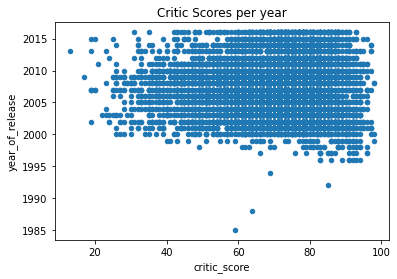

In [ ]:
games.plot(x='critic_score', y='year_of_release', kind='scatter')
plt.title('Critic Scores per year')
plt.show(block=False)

Como se ve en el gráfico, casi no tenemos critic_score antes del año 2000. Además podemos comprobar que la mayoría de los critic_scores tiene un puntaje de al menos 40 sobre 100. Al buscar en internet, descubrimos que el Entertainment Software Rating Board (ESRB) fue establecido en 1994, si bien este organismo se preocupa más bien de clasificar más que de "poner nota" a los video juegos, el mismo nos da una idea de cuando comenzó la preocupación por puntuar los video juegos. Al menos, esta información es congruente con nuestros datos. O sea que antes de esta fecha será dificil conseguir datos. Nos concentraremos entonces del 2000 en adelante.

In [ ]:
critic_filtered_nan.query('year_of_release >= 2000')['platform'].value_counts(normalize=True)

DS      0.214649
PS2     0.129269
PSP     0.111893
Wii     0.110096
PS3     0.076543
GBA     0.057519
3DS     0.052726
X360    0.051827
PSV     0.046435
PC      0.034602
PS      0.023966
PS4     0.020971
GC      0.016177
XB      0.014829
XOne    0.011684
N64     0.010635
WiiU    0.008538
GB      0.004044
DC      0.002996
WS      0.000599
Name: platform, dtype: float64

Filtrando para los años después del 2000, nos damos cuenta que la PS sale de nuestra lista. Sin embargo DS tiene 21% de valores ausentes seguida por la PS2 con 13% y luego la PSP y Wii con 11%.

In [ ]:
critic_filtered_nan.query('year_of_release >= 2000')['genre'].value_counts(normalize=True)

Action          0.188436
Misc            0.165518
Adventure       0.132564
Sports          0.123877
Role-Playing    0.089874
Simulation      0.066058
Racing          0.048682
Puzzle          0.039694
Strategy        0.039545
Fighting        0.037597
Platform        0.035650
Shooter         0.032504
Name: genre, dtype: float64

No hay mayores cambios con respecto a los generos a nivel porcentual.

In [ ]:
critic_filtered_nan.query('year_of_release >= 2000')['year_of_release'].value_counts(normalize=True)

2009.0    0.117885
2010.0    0.114290
2008.0    0.107849
2011.0    0.097963
2007.0    0.077292
2006.0    0.058868
2015.0    0.057070
2012.0    0.050629
2014.0    0.047933
2005.0    0.043439
2013.0    0.040893
2016.0    0.040443
2000.0    0.031606
2002.0    0.030857
2004.0    0.030407
2003.0    0.029059
2001.0    0.023367
2018.0    0.000150
Name: year_of_release, dtype: float64

Con los años, tampoco hay mucha variación. Los porcentajes aumentan un poco pero la distribución es la misma. 

##### Conclusión:
Analizamos la columna critic_score, revisamos los porcentajes de valores ausentes que son enormes. Tratamos de buscar alternativas para reemplazar estos valores en base a los datos existentes, pero concluimos que esto afectaría al estudio. Revisamos distintas bases de datos online pero llegamos a la conclusión de que estos datos no pueden ser reemplazados con datos de otra base ya que los criterios utilizados para la puntación nos son desconocidos. Ingresar datos de puntuación entonces seria como inventar datos, lo que también afectaría el estudio. En consecuencia, dejaremos los valores ausentes.

#### La columna: user_score <a id='valores_ausentes_user'></a>

La columna de 'user_score' tiene los mismos problemas que la columna 'critic_score'. Vamos a revisar los valores únicos para ver si encontramos algún, otro problema:

In [ ]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

En esta columna notamos que a parte de los valores ausentes (nan), tenemos valores tbd "to be determined" y valores en cero. Los valores tbd son equivalentes a valores ausentes, veamos que porcentaje de los datos representan:

In [ ]:
games['user_score'].value_counts(normalize=True)

tbd    0.242061
7.8    0.032355
8      0.028959
8.2    0.028161
8.3    0.025364
         ...   
0.6    0.000200
1.3    0.000200
0.5    0.000200
0      0.000100
9.7    0.000100
Name: user_score, Length: 96, dtype: float64

Como se puede apreciar, los valores en cero son casi despreciables, sin embargo los tbd corresponden al 24% de los datos. 

In [ ]:
games.loc[games['user_score'] == 'tbd', 'user_score'] = float('nan')

##### Conclusión:
La columna 'user_score' tiene los mismos problemas que la columna 'critic_score'. Sus valores ausentes no pueden ser completados. Notamos que a parte de los valores claramente ausentes, esta columna tenía valores tbd que corresponden también a valores no ingresados. Estos valores se transformaron en ausentes, para poder proseguir con nuestros estudio.

#### La columna: rating <a id='valores_ausentes_rating'></a>

In [ ]:
print('El número de filas con datos ausentes en la columna "rating" es:', games['rating'].isna().sum())
print()
print('El porcentaje de valores ausentes en la columna "rating" es:', games['rating'].isna().sum()*100/len(games['name']))

El número de filas con datos ausentes en la columna "rating" es: 6764

El porcentaje de valores ausentes en la columna "rating" es: 40.4714892598576


In [ ]:
games['rating'].value_counts(normalize=True)

E       0.401045
T       0.297618
M       0.157101
E10+    0.142728
EC      0.000804
K-A     0.000302
RP      0.000302
AO      0.000101
Name: rating, dtype: float64

Si vemos la distribución de nuestros resultados, el 40% de los juegos corresponden al rating E, 30% al T, 16% al M y 14% al E10+. Estudiando un poco sobre la ESBR (The Entertainment Software Rating Board), descubrimos que ellos se preocupan de poner estos ratings en base a ciertos criterios especificos. Teniendo esto en consideración, vamos a revisar algunas alternativas para ver si podemos completar estos valores ausentes. Por ejemplo, si hay generos que tienen un rating típico (los juegos de pelea quizás son todos A para adultos, mientras que los de plataforma podrían ser E para todos).

In [ ]:
games['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [ ]:
games.query('genre == "Sports"')['rating'].value_counts(normalize=True)

E       0.787276
T       0.131213
E10+    0.070908
M       0.010603
Name: rating, dtype: float64

Para los juegos de deportes, podemos ver que el 79% de los juegos corresponde a la categoría E, un 13% corresponde a T y un 7% corresponden a E10+

In [ ]:
games.query('genre == "Platform"')['rating'].value_counts(normalize=True)

E       0.629174
E10+    0.253076
T       0.112478
M       0.005272
Name: rating, dtype: float64

En el caso de los juegos de plataforma el 62% corresponde a la categoría E, el 25% corresponde a E10+ y el 11% corresponde a T.

In [ ]:
games.query('genre == "Racing"')['rating'].value_counts(normalize=True)

E       0.670872
T       0.197248
E10+    0.110092
M       0.020642
RP      0.001147
Name: rating, dtype: float64

Para los juegos de carreras el 67% corresponde a E, luego 19% corresponde a T y 11% a E10+.

In [ ]:
games.query('genre == "Role-Playing"')['rating'].value_counts(normalize=True)

T       0.540541
M       0.208494
E10+    0.142857
E       0.108108
Name: rating, dtype: float64

Para los juegos de rol el 54% corresponde a T, 20% a M, 14% a E10+ y 10% la categoría E.

In [ ]:
games.query('genre == "Puzzle"')['rating'].value_counts(normalize=True)

E       0.845029
E10+    0.125731
T       0.029240
Name: rating, dtype: float64

En el caso de los juegos del tipo puzzle el 85% de estos corresponde a la categoría E y un 12% corresponde a la categoría E10.

In [ ]:
games.query('genre == "Misc"')['rating'].value_counts(normalize=True)

E       0.518141
T       0.270975
E10+    0.189342
M       0.014739
EC      0.005669
K-A     0.001134
Name: rating, dtype: float64

En los juegos miscelaneos podemos notar que el 51% corresponde a la categoría E, el 27% a T, 18% a E10+ y 14% a M. 

In [ ]:
games.query('genre == "Shooter"')['rating'].value_counts(normalize=True)

M       0.554465
T       0.341511
E10+    0.056919
E       0.047105
Name: rating, dtype: float64

Para los juegos de disparar el 55% corresponde a la categoría M y 34% a la categoría T.

In [ ]:
games.query('genre == "Simulation"')['rating'].value_counts(normalize=True)

E       0.572183
T       0.334507
E10+    0.084507
M       0.008803
Name: rating, dtype: float64

En los juegos de simulación, el 57% de estos son de categoría E pero el 33% son de categoría T.

In [ ]:
games.query('genre == "Action"')['rating'].value_counts(normalize=True)

T       0.311243
M       0.277879
E10+    0.219835
E       0.190128
AO      0.000457
EC      0.000457
Name: rating, dtype: float64

Para los juegos de acción la dispersión más pareje 31% son de categoría T, 27% de categoría M y 22% de categoría E10+. 

In [ ]:
games.query('genre == "Fighting"')['rating'].value_counts(normalize=True)

T       0.826484
M       0.111872
E10+    0.043379
E       0.018265
Name: rating, dtype: float64

El 82% de los juegos de pelea son categoría T y 11% de categoría M.

In [ ]:
games.query('genre == "Adventure"')['rating'].value_counts(normalize=True)

E       0.363229
T       0.257848
M       0.221973
E10+    0.152466
EC      0.004484
Name: rating, dtype: float64

Con respecto a los juegos de aventura el 36% corresponde a la categoría E, 25% a la categoría T y 22% a la categoría M. Hay un 15% de juegos de este estilo que corresponden a la categoría E10+.

In [ ]:
games.query('genre == "Strategy"')['rating'].value_counts(normalize=True)

T       0.477876
E10+    0.230088
E       0.206490
M       0.073746
K-A     0.005900
RP      0.005900
Name: rating, dtype: float64

Finalmente los juegos de estrategia, un 48% corresponde a la categoría T, 23% a la categoría E10+ y 20% a la categoría E.

Como conclusión intermedia, notamos que las distribuciones en base solamente al genero no son lo suficientemente fuertes como para permitirnos realizar un reemplazo de valores ausentes en base a rating que figure más veces. Notamos que para 7 generos el rating más típico es E, si cambiamos solo en base al genero, podríamos variar los porcentajes considerablemente perjudicando nuestro estudio. Revisaremos dos plataformas al azar:

In [ ]:
games.query('platform == "Wii"')['rating'].value_counts(normalize=True)

E       0.501996
E10+    0.241517
T       0.221557
M       0.032934
EC      0.001996
Name: rating, dtype: float64

En el caso de la nintendo Wii, el 50% de sus juegos son de rating E, 24% de E10+ y 22% de T.

In [ ]:
games.query('platform == "PSP"')['rating'].value_counts(normalize=True)

T       0.369485
E       0.345588
E10+    0.194853
M       0.090074
Name: rating, dtype: float64

En cambio la PSP tiene 37% de T, 35% de E y 20% de E10+. De nuevo, las distribuciones por consola, por si solas no se podrían utilizar, pero quizás si buscamos en base a la consola y el genero:

In [ ]:
games.query('genre == "Adventure" and platform == "Wii"')['rating'].value_counts(normalize=True)

E       0.540984
T       0.196721
E10+    0.180328
M       0.081967
Name: rating, dtype: float64

En el caso del los juegos de aventura de la Nintendo Wii, 50% de estos corresponden al tipo E, 24% al tipo E+10 y 22% al tipo T.

In [ ]:
games.query('genre == "Adventure" and platform == "PSP"')['rating'].value_counts(normalize=True)

T       0.428571
M       0.214286
E10+    0.214286
E       0.142857
Name: rating, dtype: float64

Para los juegos de aventura de la PSP en cambior el 43% corresponden a la categoría T, 21% a la categoría M y 21% a la categoría E10+.

In [ ]:
games['rating'] = games['rating'].fillna('RP')

##### Conclusión.

Con respecto al rating, si bien en algunos casos podría parecer claro en su distribución (por ejemplo para los juegos de pelea dónde el 82% son de categoría M), en general la distribución es siempre bastante pareja entre los ratings E, T, M y E10+. Revisando a fondo, la mayoría de los generos tiene la categoría E como principal y los restantes se dividen en la categoría t y solo Shooter en la categoría M. Esto nos indica, que si reemplazarmos los valores ausentes siguiendo la moda, perjudicariamos claramente al rating E10+, y en mayor o menor grado a todo el resto. En este caso, en vez de dejar los valores en cero, los podemos dejar como RP que corresponde a Rating Pending o sea aún no catalogado. 

In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   object 
 10  rating           16713 non-null  object 
dtypes: float64(6), object(5)
memory usage: 2.0+ MB


### Convertir las columnas en los tipos correctos <a id='convertir_datos'></a>

Revisaremos el tipo para las columnas 'year_of_release', 'critic_score', 'user_score' y 'rating'.

In [ ]:
games['year_of_release'] = games['year_of_release'].astype('int')

In [ ]:
games['user_score'] = games['user_score'].astype('float', errors='ignore')

In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 2.0+ MB


Para 'year_of_release' pasamos el tipo de datos de float64 a int64 ya que los años son datos enteros, para 'critic_score' se dejaron los valores en float64 para no tener problemas de performance por tener una columan multi tipo. En cambio para 'user_score' se pasaron los datos de object a float64 ya que los valores nan por defecto son considerados como flat64.

### Crear la columna Ventas Totales <a id='crear_totales'></a>

Crearemos rápidamente la columna 'total_sales' (ventas totales) que corresponde a la sumatoria de las cuatro columnas de ventas ya existentes. Vamos a ordenarlo para facilitar su visualización.

In [ ]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games = games[['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales','jp_sales', 'other_sales', 'total_sales', 'critic_score', 'user_score', 'rating']]
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,RP
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,NaN,NaN,RP


## Analisis de datos <a id='analisis_datos'></a>

Con nuestra base de datos preparada, vamos a concentrarnos en los siguientes puntos. Vamos a analizar la cantidad de juegos lanzados por año, ver como varían las ventas anualmente para cada plataforma. En base a nuestros estudios buscaremos a las plataformas líderes en ventas. Revisaremos si las reseñas de usuarios y profesionales influyen en las ventas y finalmente buscaremos que generos son los más rentables.

### Juegos estrenados por año <a id='juegos_anuales'></a>

In [ ]:
yearly_release_games = games.pivot_table(index='year_of_release', values='name', aggfunc='count')
yearly_release_games.columns = ['number of games']
yearly_release_games.sort_values(by='number of games', ascending=False)

,number of games
year_of_release,
2008,1452
2009,1444
2010,1279
2007,1217
2011,1178
2006,1024
2005,956
2002,852
2003,790


In [ ]:
print('La cantidad de juegos promedios por año es de:', yearly_release_games.mean())
print('La mediana de los juegos estrenados por año es de:', yearly_release_games.median())

La cantidad de juegos promedios por año es de: number of games    407.634146
dtype: float64
La mediana de los juegos estrenados por año es de: number of games    264.0
dtype: float64


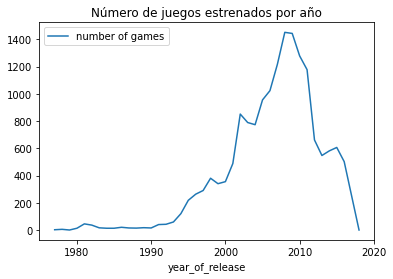

In [ ]:
yearly_release_games.plot(kind='line')
plt.title('Número de juegos estrenados por año')
plt.show(block=False)

Como se puede apreciar los datos varían mucho desde al año 1979 con solo 1 juego estrenado comparado con el año 2008 dónde hubo 1455 estrenos! Como se puede apreciar, la mediana es de 418 juegos al año, con lo cúal, aparentemente, los datos más relevantes para nuestro estudio, corresponden al periodo entre el 2001 y el 2016. Del 2000 hacia abajo los valores decrecen rápido y del año 1994 hacia abajo son más bien anécdoticos.

### Ventas por Plataformas <a id='ventas_plataforma'></a>

In [ ]:
sales_by_console = games.pivot_table(index='platform', values='total_sales', aggfunc='sum')
sales_by_console.sort_values(by='total_sales', ascending=False)

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


In [ ]:
sales_by_console = games.pivot_table(index='platform', values='total_sales', aggfunc='sum')
sales_by_console.sort_values(by='total_sales', ascending=False)

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


In [ ]:
print('La cantidad de ventas promedios por plataforma es de:', sales_by_console.mean())
print('La mediana de las ventas por plataforma es de:', sales_by_console.median())

La cantidad de ventas promedios por plataforma es de: total_sales    287.525484
dtype: float64
La mediana de las ventas por plataforma es de: total_sales    200.04
dtype: float64


Lo primero que podemos notar es la diferencia entre la plataforma más popular que es con diferencia la PS2 (1255.77 millones de dolares) versus la menos popular que es la PCFX (0.03 millones de dolares) y la media que son 288 millones de dolares. Las plataformas más populares son la PS2, X360, PS3, Wii y la DS. En cambio las menos populares son la TG16, 3DO, GG y PCFX. Analizemos la distribución de ventas anual de las plataformas más populares. 

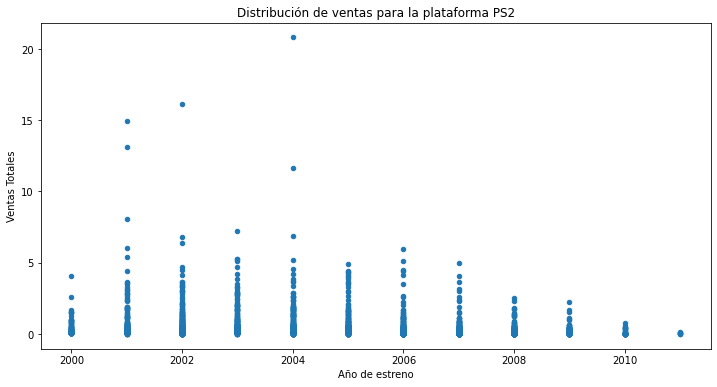

In [ ]:
games.query('platform == "PS2"').plot(x='year_of_release', y='total_sales', kind='scatter', figsize=(12,6))
plt.xlabel('Año de estreno')
plt.ylabel('Ventas Totales')
plt.title('Distribución de ventas para la plataforma PS2')
plt.show(block=False)

Al analizar la distribución de ventas para la plataforma PS2 notamos (dejando de lado los puntos excepcionales) una suerte de campana que parte en el año 2000 con un máximo de 4 millones de dolares, sube justo por encima de los 5 millones de dolares en el 2003 y luego comienza a bajar progresivamente para el año 2009 llegar a un máximo de 2 millones de dolares y casi desaparecer en el año 2012. Está plataforma tuvo una vida de 11 años.

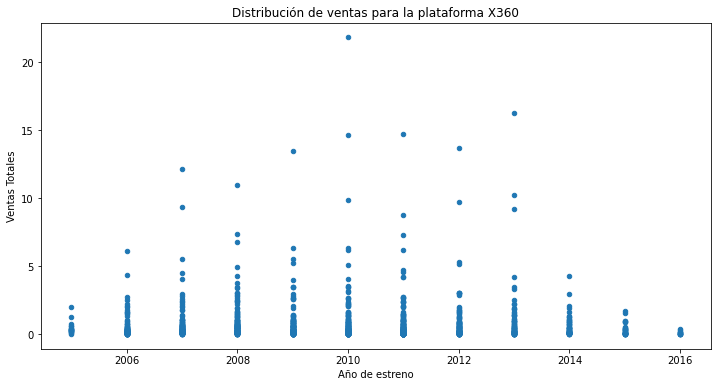

In [ ]:
games.query('platform == "X360"').plot(x='year_of_release', y='total_sales', kind='scatter', figsize=(12,6))
plt.xlabel('Año de estreno')
plt.ylabel('Ventas Totales')
plt.title('Distribución de ventas para la plataforma X360')
plt.show(block=False)

En el caso de la segunda plataforma más popular, la X360, notamos un comportamiento similar. Parte en el año 2005 con un máximo de 2.5 millones de dolares, llega a su máximo en 2008 pasado los 5 millones y comienza a bajar para desaparecer el 2017. De nuevo tuvo una vida de 11 años.

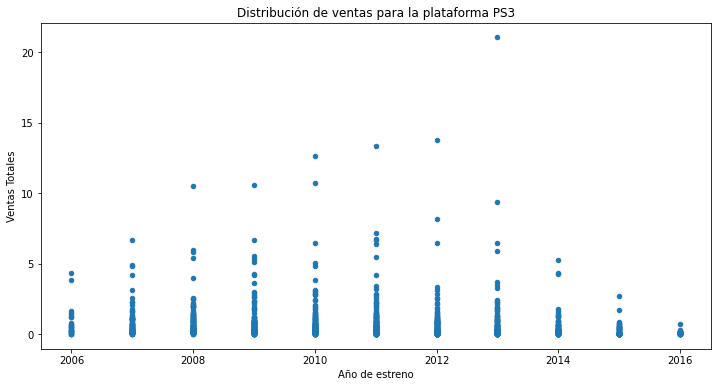

In [ ]:
games.query('platform == "PS3"').plot(x='year_of_release', y='total_sales', kind='scatter', figsize=(12,6))
plt.xlabel('Año de estreno')
plt.ylabel('Ventas Totales')
plt.title('Distribución de ventas para la plataforma PS3')
plt.show(block=False)

En el caso de la PS3, notamos que parte con una cifra cercana a los 2.5 millones de dolares. Entre el 2009 y el 2011 llega a su pick y luego comienza a decender hasta el 2016 (fin de nuestro estudio).

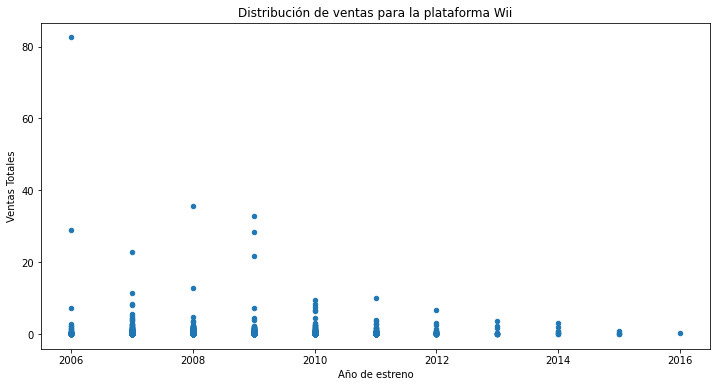

In [ ]:
games.query('platform == "Wii"').plot(x='year_of_release', y='total_sales', kind='scatter', figsize=(12,6))
plt.xlabel('Año de estreno')
plt.ylabel('Ventas Totales')
plt.title('Distribución de ventas para la plataforma Wii')
plt.show(block=False)

La última de las más populares es la Nintendo Wii. Esta fue estrenada en noviembre del 2006. Su distribución parece coincidir con las otras cuatro plataformas. De esta manera notamos una tendencia en el ciclo de vida de las plataformas de 11 años. Revisemos cada cuanto tiempo salen nuevas plataformas tomando de ejemplo la PS, PS2, PS3 y PS4 por un lado y la NES, SNES y N64 por otro.

In [ ]:
print('La Plataforma PS tiene sus primeras ventas en el año:', games.query('platform == "PS"')['year_of_release'].min(),
      'y sus últimas ventas en', games.query('platform == "PS"')['year_of_release'].max(), '.')
print('La Plataforma PS2 tiene sus primeras ventas en el año:', games.query('platform == "PS2"')['year_of_release'].min(),
      'y sus últimas ventas en', games.query('platform == "PS2"')['year_of_release'].max(), '.')
print('La Plataforma PS3 tiene sus primeras ventas en el año:', games.query('platform == "PS3"')['year_of_release'].min(),
      'y sus últimas ventas en', games.query('platform == "PS3"')['year_of_release'].max(), '.')
print('La Plataforma PS4 tiene sus primeras ventas en el año:', games.query('platform == "PS4"')['year_of_release'].min(),
      'y sus últimas ventas en', games.query('platform == "PS4"')['year_of_release'].max(), '.')

La Plataforma PS tiene sus primeras ventas en el año: 1994 y sus últimas ventas en 2003 .
La Plataforma PS2 tiene sus primeras ventas en el año: 2000 y sus últimas ventas en 2011 .
La Plataforma PS3 tiene sus primeras ventas en el año: 2006 y sus últimas ventas en 2016 .
La Plataforma PS4 tiene sus primeras ventas en el año: 2013 y sus últimas ventas en 2016 .


Podemos notar que la PS tuvo un ciclo de vida de 9 años, 6 años despúes de haber sido estrenada salió la PS2. La PS2, duró 11 años. La PS3 se estrenó el 2006, esto quiere decir 6 años despues del estreno de la PS2, y tuvo un ciclo de vida de 10 años (ojo esto porque nuestro estudio terminó el 2016, podría quedarle un año más). La PS4, se estrena 7 años despúes de la PS3.

In [ ]:
print('La Plataforma NES tiene sus primeras ventas en el año:', games.query('platform == "NES"')['year_of_release'].min(),
      'y sus últimas ventas en', games.query('platform == "NES"')['year_of_release'].max(), '.')
print('La Plataforma SNES tiene sus primeras ventas en el año:', games.query('platform == "SNES"')['year_of_release'].min(),
      'y sus últimas ventas en', games.query('platform == "SNES"')['year_of_release'].max(), '.')
print('La Plataforma N64 tiene sus primeras ventas en el año:', games.query('platform == "N64"')['year_of_release'].min(),
      'y sus últimas ventas en', games.query('platform == "N64"')['year_of_release'].max(), '.')

La Plataforma NES tiene sus primeras ventas en el año: 1983 y sus últimas ventas en 1994 .
La Plataforma SNES tiene sus primeras ventas en el año: 1990 y sus últimas ventas en 1999 .
La Plataforma N64 tiene sus primeras ventas en el año: 1996 y sus últimas ventas en 2002 .


Si revisamos las nintendo, la NES tiene un ciclo de vida de 11 años, la SNES de 9 años y la N64 de 8 años. Cada plataforma se estrenó 6 años después de la anterior. 

Revisemos el comportamiento de todas las ventas en todas las plataformas con un heatmap para comprobar nuestras conclusiones inciales.

In [ ]:
sales_by_consoles = games.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')

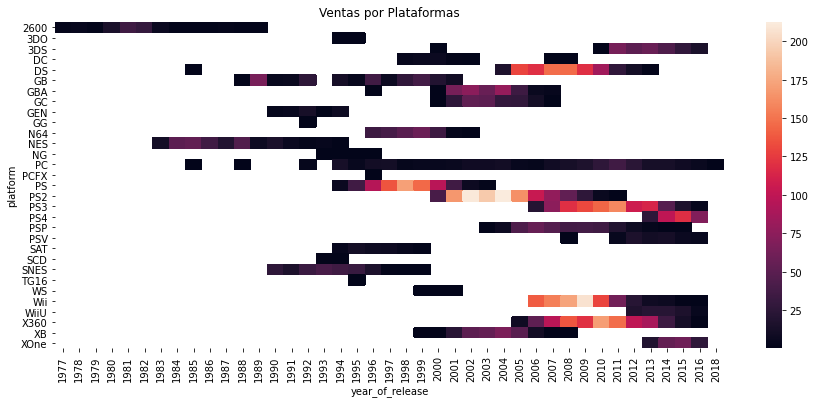

In [ ]:
f, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(sales_by_consoles)
plt.title('Ventas por Plataformas')
plt.show(block=False)

**En conclusión**, hemos descubierto que las consolas tienen, en general, un ciclo de vida del orden de los 11 años y en general aparecen nuevas consolas cada seis años. Por otro lado, podemos notar que en general las consolas tienden a crecer entre los 5 y 7 primeros años, luego decaen sus ventas. Teniendo estos datos en mente, vamos a acotar los datos de nuestra tabla a datos a partir del año 2012. Escogemos este año porque 5 años despúes será el año 2017, o sea nuestro año de estudio. Podremos entonces revisar ya las últimas consolas que estarán ese año y podremos revisar lo que se viene.

### Ventas por Plataformas en base acotada <a id='ventas_plataforma_2'></a>

Acotaremos nuestra base de datos en base a nuestros resultados:

In [ ]:
valid_platform = games.query('year_of_release >= 2012')
valid_platform.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2903 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2903 non-null   object 
 1   platform         2903 non-null   object 
 2   year_of_release  2903 non-null   int64  
 3   genre            2903 non-null   object 
 4   na_sales         2903 non-null   float64
 5   eu_sales         2903 non-null   float64
 6   jp_sales         2903 non-null   float64
 7   other_sales      2903 non-null   float64
 8   total_sales      2903 non-null   float64
 9   critic_score     1320 non-null   float64
 10  user_score       1540 non-null   float64
 11  rating           2903 non-null   object 
dtypes: float64(7), int64(1), object(4)
memory usage: 294.8+ KB


Nuestra base de datos validos tiene 2903 juegos, un buen número para poder realizar nuestro estudio. Revisemos los ingresos totales y los años de estreno para cada plataforma:

In [ ]:
sales_by_valid_console = valid_platform.pivot_table(index='platform', aggfunc={'year_of_release':'min', 'total_sales':'sum'})
sales_by_valid_console.sort_values(by='year_of_release', ascending=False)

,total_sales,year_of_release
platform,,
PS4,314.14,2013
XOne,159.32,2013
3DS,194.64,2012
DS,12.61,2012
PC,63.39,2012
PS3,289.08,2012
PSP,11.31,2012
PSV,49.18,2012
Wii,38.45,2012


Como se puede apreciar, tenemos ahora dos consolas del 2013 y el resto del 2012. Vamos a ordenarlas por ventas:

In [ ]:
sales_by_valid_console.sort_values(by='total_sales', ascending=False)

,total_sales,year_of_release
platform,,
PS4,314.14,2013
PS3,289.08,2012
X360,236.62,2012
3DS,194.64,2012
XOne,159.32,2013
WiiU,82.19,2012
PC,63.39,2012
PSV,49.18,2012
Wii,38.45,2012


Podemos notar que la PS4, la PS3, y la X360 son las líderes en ventas. Las plataformas con menos ventas son las Wii, DS y PSP. 

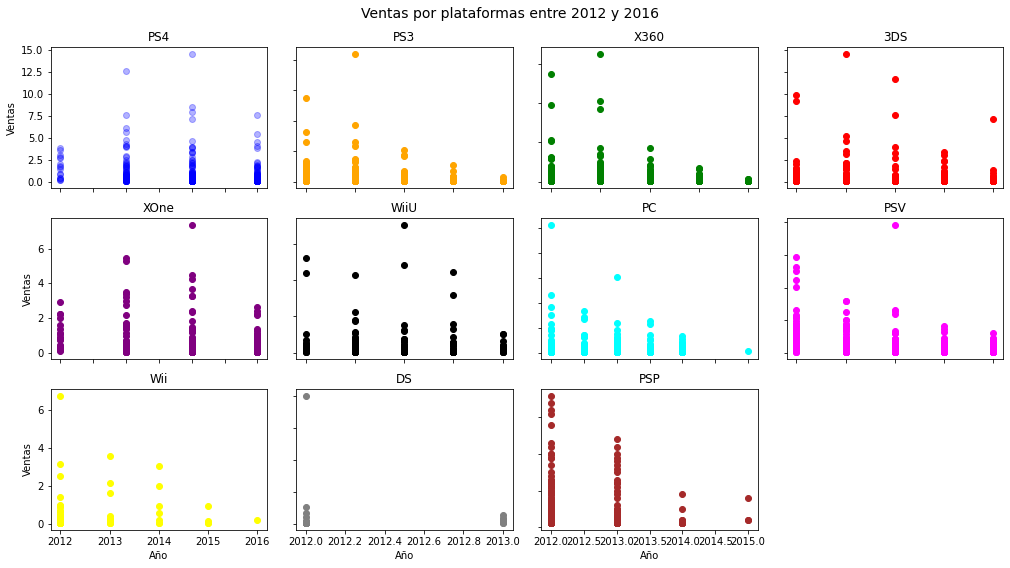

In [ ]:
fig, axs = plt.subplots(3,4, figsize=(14,8))
fig.suptitle("Ventas por plataformas entre 2012 y 2016", fontsize=14)
axs[0,0].scatter(valid_platform.query('platform == "PS4"').year_of_release, valid_platform.query('platform == "PS4"').total_sales, alpha=0.3, color='blue')
axs[0,0].set_title('PS4')
axs[0,1].scatter(valid_platform.query('platform == "PS3"').year_of_release, valid_platform.query('platform == "PS3"').total_sales, color='orange')
axs[0,1].set_title('PS3')
axs[0,2].scatter(valid_platform.query('platform == "X360"').year_of_release, valid_platform.query('platform == "X360"').total_sales, color='green')
axs[0,2].set_title('X360')
axs[0,3].scatter(valid_platform.query('platform == "3DS"').year_of_release, valid_platform.query('platform == "3DS"').total_sales, color='red')
axs[0,3].set_title('3DS')
axs[1,0].scatter(valid_platform.query('platform == "XOne"').year_of_release, valid_platform.query('platform == "XOne"').total_sales, color='purple')
axs[1,0].set_title('XOne')
axs[1,1].scatter(valid_platform.query('platform == "WiiU"').year_of_release, valid_platform.query('platform == "WiiU"').total_sales, color='black')
axs[1,1].set_title('WiiU')
axs[1,2].scatter(valid_platform.query('platform == "PC"').year_of_release, valid_platform.query('platform == "PC"').total_sales, color='cyan')
axs[1,2].set_title('PC')
axs[1,3].scatter(valid_platform.query('platform == "PSV"').year_of_release, valid_platform.query('platform == "PSV"').total_sales, color='magenta')
axs[1,3].set_title('PSV')
axs[2,0].scatter(valid_platform.query('platform == "Wii"').year_of_release, valid_platform.query('platform == "Wii"').total_sales, color='yellow')
axs[2,0].set_title('Wii')
axs[2,1].scatter(valid_platform.query('platform == "DS"').year_of_release, valid_platform.query('platform == "DS"').total_sales, color='grey')
axs[2,1].set_title('DS')
axs[2,2].scatter(valid_platform.query('platform == "PSP"').year_of_release, valid_platform.query('platform == "PSP"').total_sales, color='brown')
axs[2,2].set_title('PSP')
axs[2,3].axis('off')

for ax in axs.flat:
    ax.set(xlabel='Año', ylabel='Ventas')
    
for ax in axs.flat:
    ax.label_outer()

plt.imagesize=(15, 6)

plt.tight_layout()

Al observar las ventas por años de las plataformas en nuestro dataset revisado, podemos notar que solo tenemos tres consolas que permanecen vigentes, la PS4, las 3DS y la XOne. El resto de consolas parecen estar todas decayendo en ventas. Veamos la distribución de cada una:

In [ ]:
distribution_by_platform = valid_platform.pivot_table(index='year_of_release', columns='platform', values='total_sales')

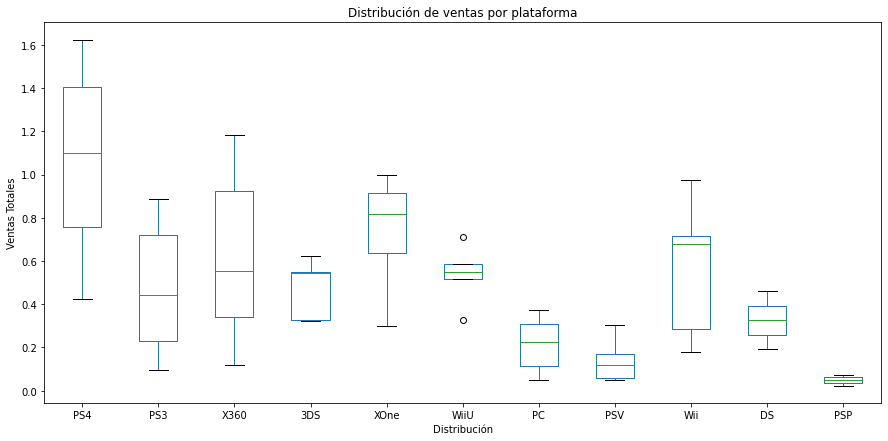

In [ ]:
ax = distribution_by_platform[['PS4', 'PS3', 'X360', '3DS', 'XOne', 'WiiU', 'PC', 'PSV', 'Wii', 'DS', 'PSP']].plot(kind='box', figsize=(15,7))
plt.xlabel('Distribución')
plt.ylabel('Ventas Totales')
plt.title('Distribución de ventas por plataforma')
plt.show(block=False)

Viendo la distribución de ventas por plataformas podemos notar que en general las plataformas venden entre 0,2 y 1 millon. Solo la PS4 supera estas cifras. En el gráfico, notamos que las plataformas con mejores ventas son pues la PS4, X360 y la XOne. 

Notamos que la media está bastante al medio de la caja en algunos casos como por ejemplo la PS4 o la PS3. Hay varias consolas que su media está más inclinada al borde superior como es el caso de XOne o un extremo que nos resulta interesante es la 3DS. El caso opuesto (la media está en el borde bajo de la caja) encontramos los juegos de la DS. Vamos a analizar las medias de algunos de estos casos:

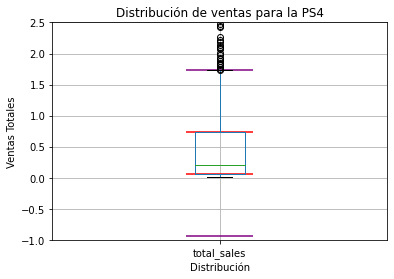

In [ ]:
Q1_PS4 = valid_platform.query('platform == "PS4"')['total_sales'].quantile(0.25)
Q3_PS4 = valid_platform.query('platform == "PS4"')['total_sales'].quantile(0.75)
IQR_PS4 = Q3_PS4 - Q1_PS4

valid_platform.query('platform == "PS4"').boxplot(column='total_sales')
plt.xlabel('Distribución')
plt.ylabel('Ventas Totales')
plt.title('Distribución de ventas para la PS4')

plt.ylim(-1, 2.5)
plt.hlines(y=[Q1_PS4, Q3_PS4], xmin=0.9, xmax=1.1, color='red')
plt.hlines(y=(Q3_PS4+1.5*IQR_PS4), xmin=0.9, xmax=1.1, color='purple')
plt.hlines(y=(Q1_PS4-1.5*IQR_PS4), xmin=0.9, xmax=1.1, color='purple')
plt.show(block=False)

Si analizamos la distribución de la PS4 (quitando los valores excepcionales que llegan hasta 5 millones de dolares), notamos que el bigote superior tiene muchos valores por encima. El bigote inferior en cambio está muy por debajo del cero, pero sin valores. Es interesante notar que la media está más inclinada hacia abajo en realidad (más o menos 0.2 millones de dolares), mientras que el primer cuantil esta cerca del cero, el tercer cuantil se acerca al 0.75.

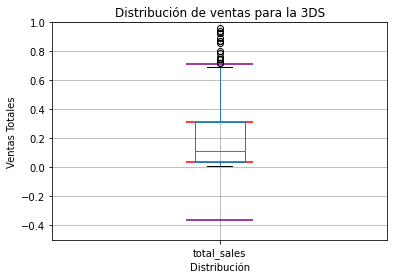

In [ ]:
Q1_3DS = valid_platform.query('platform == "3DS"')['total_sales'].quantile(0.25)
Q3_3DS = valid_platform.query('platform == "3DS"')['total_sales'].quantile(0.75)
IQR_3DS = Q3_3DS - Q1_3DS

valid_platform.query('platform == "3DS"').boxplot(column='total_sales')
plt.xlabel('Distribución')
plt.ylabel('Ventas Totales')
plt.title('Distribución de ventas para la 3DS')

plt.ylim(-0.5, 1)
plt.hlines(y=[Q1_3DS, Q3_3DS], xmin=0.9, xmax=1.1, color='red')
plt.hlines(y=(Q3_3DS+1.5*IQR_3DS), xmin=0.9, xmax=1.1, color='purple')
plt.hlines(y=(Q1_3DS-1.5*IQR_3DS), xmin=0.9, xmax=1.1, color='purple')
plt.show(block=False)

En el caso de la 3DS, tuvimos que hacer zoom al gráfico ya que los valores excepcionales pasan los 14 millones. Si nos fijamos, nuevamente la media en realidad se encuentra más cercana al primer cuantil que al medio de la caja. En este caso, las excepciones son extremas, ya que el bigote superior no supera los 0.8 millones, sin embargo encontramos valores hasta de 14 millones.

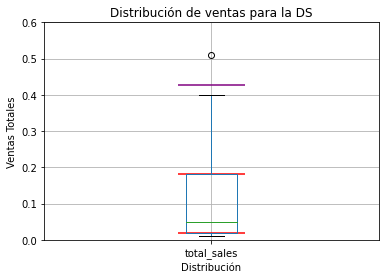

In [ ]:
Q1_DS = valid_platform.query('platform == "DS"')['total_sales'].quantile(0.25)
Q3_DS = valid_platform.query('platform == "DS"')['total_sales'].quantile(0.75)
IQR_DS = Q3_DS - Q1_DS

valid_platform.query('platform == "DS"').boxplot(column='total_sales')
plt.xlabel('Distribución')
plt.ylabel('Ventas Totales')
plt.title('Distribución de ventas para la DS')

plt.ylim(0, 0.6)
plt.hlines(y=[Q1_DS, Q3_DS], xmin=0.9, xmax=1.1, color='red')
plt.hlines(y=(Q3_DS+1.5*IQR_DS), xmin=0.9, xmax=1.1, color='purple')
plt.hlines(y=(Q1_DS-1.5*IQR_DS), xmin=0.9, xmax=1.1, color='purple')
plt.show(block=False)

En el caso de la DS, nuevamente notamos la media en la parte baja de la caja, más cerca del primer cuantil. Encontramos un patrón. Vamos a observar de cerca estás medianas. 

In [ ]:
platform_mean_sales = valid_platform.groupby('platform')['total_sales'].median()
platform_mean_sales.sort_values(ascending=False)

platform
X360    0.310
WiiU    0.220
XOne    0.220
PS4     0.200
PS3     0.195
Wii     0.180
3DS     0.110
PC      0.080
DS      0.050
PSV     0.050
PSP     0.035
Name: total_sales, dtype: float64

Es interesante notar que las medianas son en realidad bastante similares entre las distintas plataformas. Vamos a ver un poco más de cerca su distribución:

In [ ]:
platform_mean_sales.describe()

count    11.00000
mean      0.15000
std       0.08975
min       0.03500
25%       0.06500
50%       0.18000
75%       0.21000
max       0.31000
Name: total_sales, dtype: float64

A partir de estos datos notamos algunos puntos interesantes. El promedio de medianas es de 0.15 millones, con una desviación estándar de 0.09 millones, lo que nos indica que en general, quitando las ventas excepcionales, estás plataformas se comportan de manera muy similar. 

#### Conclusiones sobre las ventas por Plataformas <a id='ventas_plataforma_conclusiones'></a>

Creamos una tabla acotada 'valid_platform' que incluye las ventas del 2012 en adelante, basandonos en los ciclos de vida de las plataforma. Nuestra nueva base de datos comprende 11 plataformas, de estas, las con mayores ventas son la PS4, X360 y la XOne. Al revisar las ventas por año de las plataformas más populares, notamos como la X360, la PS3, la Wii y la DS ya son consolas 'viejas' que están decayendo en sus ventas. Mientrás que la PS4, las 3DS y la XOne están manteniendo sus ventas constantes.

Cuando revisamos la distribución de ventas por plataforma notamos que la mayoría de estás tienen sus ventas entre los 0.2 millones y 1 millón. 

Finalmente, encontramos que si dejamos de lado las ventas excepcionales de cada plataforma (o sea, cuando comparamos sus medianas) estás se encuentran todas en un rango de 0.15 millones con un más, menos 0.09 millones de diferencia. 

### Reseñas de los usuarios <a id='estudio_reseñas'></a>

Observemos si las criticas de usuarios y profesionales afecta a las ventas de los videojuegos. Tomaremos de ejemplo la plataforma con mayores ventas de nuestra base acotada la PS4. Con el fin de poder visualizar la correlación del rating con respecto a los precios crearemos el diccionario siguiente:

In [ ]:
reseñas_PS4 = valid_platform.query('platform == "PS4"').loc[:,['total_sales','critic_score', 'user_score']]

In [ ]:
reseñas_PS4.corr().style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,total_sales,critic_score,user_score
total_sales,1.00,0.41,-0.03
critic_score,0.41,1.00,0.56
user_score,-0.03,0.56,1.00


Notamos que las puntaciones de profesionales tienen en general una influencia positiva en las ventas de los video juegos. En cambio, las criticas de usuarios tienen un correlación negativa pero bastante pequeña. Comprobemos esto con dos juegos que podemos encontrar en varias plataformas:

In [ ]:
valid_platform.query('name == "Grand Theft Auto V"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,21.05,97.0,8.2,M
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,16.27,97.0,8.1,M
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,12.62,97.0,8.3,M
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,5.47,97.0,7.9,M
1730,Grand Theft Auto V,PC,2015,Action,0.39,0.69,0.00,0.09,1.17,96.0,7.9,M


Observemos el caso de "Grand Theft Auto V" este juego tuvo criticas de profesionales muy altas 97 y 96 sobre 100. Es interesante comparar por ejemplo las ventas de la PS4 (estrenado en 2014) versus la XOne (estrenado en 2014). Si nos fijamos en la tabla ambas consolas tienen una critica de profesionales de 97 sobre 100, pero difieren bastante en la critica de los usuarios con 8.3 puntos para la PS3 versus 7.9 puntos para la XOne. En ventas la PS4 casi duplica a la XOne. Una diferencia similar se aprecia si comparamos la XOne con PC (estrenado en 2015) donde ambas plataformas consiguieron una critica de parte de los usuarios de 7.9, pero difieren de un punto a favor de la XOne con respecto a la critica prefesional. Es importante recordar que estás diferencias en las puntuaciones no son tan grandes y existen muchos factores más a tomar en consideración (como por ejemplo la popularidad de las plataformas, la facilidad de piratear juegos en un PC con respecto al resto de las plataformas, etc.)

In [ ]:
games.query('name == "Madden NFL 2004"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,2003,Sports,4.26,0.26,0.01,0.71,5.24,94.0,8.5,E
1881,Madden NFL 2004,XB,2003,Sports,1.02,0.02,0.00,0.05,1.09,92.0,8.3,E
3889,Madden NFL 2004,GC,2003,Sports,0.40,0.10,0.00,0.01,0.51,94.0,7.7,E
5708,Madden NFL 2004,GBA,2003,Sports,0.22,0.08,0.00,0.01,0.31,70.0,6.6,E


Analizando otro juego al azar "Madden NFL 2004", notamos que nuevamente las reseñas acompañan a los valores de los juegos. A mayor puntuación, mayores ventas.

### Rentabilidad por Género <a id='estudio_generos'></a>

Vamos a analizar los generos de cada juego. Observaremos su distribución y intentaremos definir cuales son los más rentables.

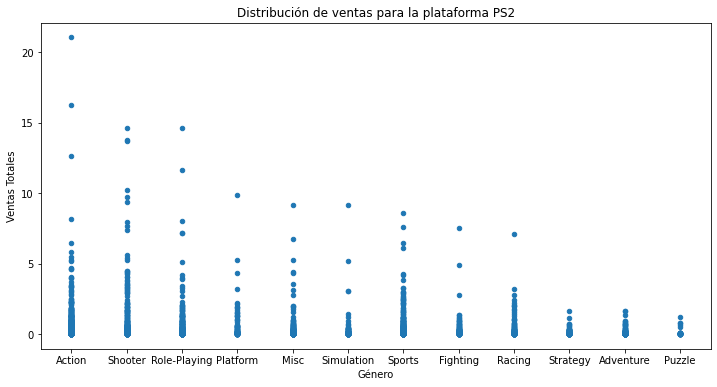

In [ ]:
valid_platform.plot(x='genre', y='total_sales', kind='scatter', figsize=(12,6))
plt.xlabel('Género')
plt.ylabel('Ventas Totales')
plt.title('Distribución de ventas para la plataforma PS2')
plt.show(block=False)

Observando el diagrama de dispersión notamos géneros que efectivamente tienen mayores ventas que otros. Se puede ver que los juegos de disparar parecen ser los más populares, pero los de acción tienen la excepción más radical. Los juegos de aventura, puzzles y estrategia parecen ser los que tienen menores ventas. Vamos a revisar está disperción con diagramas de cajas:

In [ ]:
distribution_by_genre = valid_platform.pivot_table(index='year_of_release', columns='genre', values='total_sales')

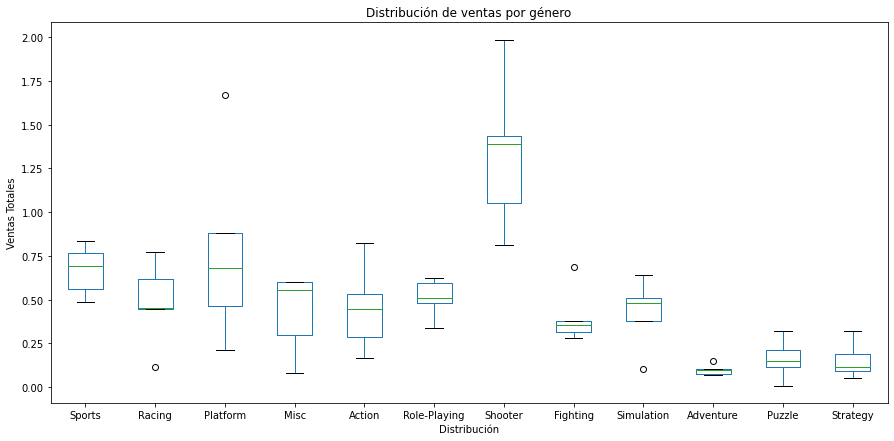

In [ ]:
ax = distribution_by_genre[['Sports', 'Racing', 'Platform', 'Misc', 'Action', 'Role-Playing', 'Shooter', 'Fighting', 'Simulation', 'Adventure', 'Puzzle', 'Strategy']].plot(kind='box', figsize=(15,7))
plt.xlabel('Distribución')
plt.ylabel('Ventas Totales')
plt.title('Distribución de ventas por género')
plt.show(block=False)

Con nuestro diagrama de cajas ya podemos aclarar algunos detalles. Efectivamente Shooter son los más populares, seguido por los juegos de plataforma y luego los de deportes. También podemos ver que en general los juegos de puzzle, estrategia y aventura son los menos vendidos.

## Perfil de usuario por región <a id='estudio_perfil'></a>

Vamos revisar los perfiles de los usuarios en Norte America, Europa y Japón. Nos enfocaremos primero en cuales son sus plataformas favoritas y que generos son los más vendidos. Luego veremos si hay una correlación entre el rating y las ventas en cada región.

### Perfil de Norte America <a id='estudio_perfil_NA'></a>

In [ ]:
platform_na = valid_platform.groupby('platform')['na_sales'].sum()
platform_na.sort_values(ascending=False).head()

platform
X360    140.12
PS4     108.74
PS3     103.45
XOne     93.12
3DS      55.31
Name: na_sales, dtype: float64

In [ ]:
genre_na = valid_platform.groupby('genre')['na_sales'].sum()
genre_na.sort_values(ascending=False).head()

genre
Action          179.72
Shooter         144.79
Sports           81.53
Role-Playing     64.00
Misc             38.19
Name: na_sales, dtype: float64

En Norte America, podemos notar que las consolas predilectas son la X360, PS4, PS3, XOne y 3DS. Los generos más vendidos son los juegos de acción, disparos, deportes, juegos de rol y miscelaneos. 

### Perfil de Europa <a id='estudio_perfil_EU'></a>

In [ ]:
platform_eu = valid_platform.groupby('platform')['eu_sales'].sum()
platform_eu.sort_values(ascending=False).head()

platform
PS4     141.09
PS3     107.02
X360     74.52
XOne     51.59
3DS      42.64
Name: eu_sales, dtype: float64

In [ ]:
genre_eu = valid_platform.groupby('genre')['eu_sales'].sum()
genre_eu.sort_values(ascending=False).head()

genre
Action          160.79
Shooter         113.47
Sports           69.25
Role-Playing     48.53
Racing           27.29
Name: eu_sales, dtype: float64

En Europa, la consola más vendida es la PS4, seguida por la PS3, X360, XOne y la 3DS. Los juegos de acción también son los predilectos para los europeos. Luego los juegos de disparos, deporte, juegos de rol y finalmente los de carreras.

### Perfil de Japón <a id='estudio_perfil_JP'></a>

In [ ]:
platform_jp = valid_platform.groupby('platform')['jp_sales'].sum()
platform_jp.sort_values(ascending=False).head()

platform
3DS     87.82
PS3     35.29
PSV     21.04
PS4     15.96
WiiU    13.01
Name: jp_sales, dtype: float64

In [ ]:
genre_jp = valid_platform.groupby('genre')['jp_sales'].sum()
genre_jp.sort_values(ascending=False).head()

genre
Role-Playing    65.47
Action          52.80
Misc            12.86
Simulation      10.41
Fighting         9.44
Name: jp_sales, dtype: float64

En Japón las consolas más vendidas son la 3DS, PS3, PSV, PS4 y la WiiU. Los juegos más vendidos en cambio son los de Rol, seguidos por los de acción, miscelaneos, simulaciones y los de peleas.

## Comprobación de Hipotesis:<a id='hipotesis'></a>

A continuación nos concentraremos en estudiar nuestras dos hipótesis iniciales:

- Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
Para ello generaremos las dos sentencias siguientes para el ingreso total de cada plan:

H0: las medias de las calificaciónes (de Xbox y PC) son iguales

Ha: las medias no son iguales

- Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
Realizaremos lo mismo para el caso de los estados de la siguiente manera:

H0: las calificaciones medias de los generos de Acción y Deportes son iguales

Ha: las medias no son iguales

Para ello, utilizaremos un umbral de significancia del 5%, que es un umbral común para este tipo de casos.

In [ ]:
significance = 0.05

### Hipótesis I <a id='comprobación_hipotesis_1'></a>

Para poder revisar nuestras hipótesis sacaremos los valores ausentes de las columnas relevantes:

In [ ]:
critic_no_nan = valid_platform.dropna(subset=['critic_score'])

In [ ]:
user_no_nan = valid_platform.dropna(subset=['user_score'])

Revisaremos primero las calificaciones de los profesionales:

In [ ]:
stat, p_value = ttest_ind(
    critic_no_nan.loc[critic_no_nan["platform"] == 'XOne', "critic_score"],
    critic_no_nan.loc[critic_no_nan["platform"] == 'PC', "critic_score"]
)
print(f"""
    La clasificación promedio de profesionales para la Xbox es: {critic_no_nan.loc[critic_no_nan["platform"] == 'XOne', "critic_score"].mean()}
    La clasificación promedio de profesionales para la PC es: {critic_no_nan.loc[critic_no_nan["platform"] == 'PC', "critic_score"].mean()}

    t-statistic: {stat}
    p-value: {p_value}
""")

if p_value < significance:
    print('Rechazamos nuestra hipótesis nula')
else:
    print('No rechazamos nuestra hipótesis nula')


    La clasificación promedio de profesionales para la Xbox es: 73.32544378698225
    La clasificación promedio de profesionales para la PC es: 75.70588235294117

    t-statistic: -1.9619233095169737
    p-value: 0.05051867281956182

No rechazamos nuestra hipótesis nula


Analizaremos entonces la criticas de usuarios:

In [ ]:
stat, p_value = ttest_ind(
    user_no_nan.loc[user_no_nan["platform"] == 'XOne', "user_score"],
    user_no_nan.loc[user_no_nan["platform"] == 'PC', "user_score"]
)
print(f"""
    La clasificación promedio de usuarios para la Xbox es: {user_no_nan.loc[user_no_nan["platform"] == 'XOne', "user_score"].mean()}
    La clasificación promedio de usuarios para la PC es: {user_no_nan.loc[user_no_nan["platform"] == 'PC', "user_score"].mean()}

    t-statistic: {stat}
    p-value: {p_value}
""")

if p_value < significance:
    print('Rechazamos nuestra hipótesis nula')
else:
    print('No rechazamos nuestra hipótesis nula')


    La clasificación promedio de usuarios para la Xbox es: 6.521428571428572
    La clasificación promedio de usuarios para la PC es: 6.431603773584905

    t-statistic: 0.5777604277433357
    p-value: 0.563757590027855

No rechazamos nuestra hipótesis nula


### Hipótesis II <a id='comprobación_hipotesis_2'></a>

Revisaremos primero las calificaciones de los profesionales:

In [ ]:
stat, p_value = ttest_ind(
    critic_no_nan.loc[critic_no_nan["genre"] == 'Action', "critic_score"],
    critic_no_nan.loc[critic_no_nan["genre"] == 'Sports', "critic_score"]
)
print(f"""
    La clasificación promedio de profesionales para los juegos de acción es: {critic_no_nan.loc[critic_no_nan["genre"] == 'Action', "critic_score"].mean()}
    La clasificación promedio de profesionales para los juegos de deportes es: {critic_no_nan.loc[critic_no_nan["genre"] == 'Sports', "critic_score"].mean()}

    t-statistic: {stat}
    p-value: {p_value}
""")

if p_value < significance:
    print('Rechazamos nuestra hipótesis nula')
else:
    print('No rechazamos nuestra hipótesis nula')


    La clasificación promedio de profesionales para los juegos de acción es: 71.4090909090909
    La clasificación promedio de profesionales para los juegos de deportes es: 72.8951048951049

    t-statistic: -1.1887107679470623
    p-value: 0.23503913243432514

No rechazamos nuestra hipótesis nula


Analizaremos entonces la criticas de usuarios:

In [ ]:
stat, p_value = ttest_ind(
    user_no_nan.loc[user_no_nan["genre"] == 'Action', "user_score"],
    user_no_nan.loc[user_no_nan["genre"] == 'Sports', "user_score"]
)
print(f"""
    La clasificación promedio de usuarios para los juegos de acción es: {user_no_nan.loc[valid_platform["genre"] == 'Action', "user_score"].mean()}
    La clasificación promedio de usuarios para los juegos de deportes es: {user_no_nan.loc[valid_platform["genre"] == 'Sports', "user_score"].mean()}

    t-statistic: {stat}
    p-value: {p_value}
""")

if p_value < significance:
    print('Rechazamos nuestra hipótesis nula')
else:
    print('No rechazamos nuestra hipótesis nula')


    La clasificación promedio de usuarios para los juegos de acción es: 6.827134724857685
    La clasificación promedio de usuarios para los juegos de deportes es: 5.455897435897437

    t-statistic: 11.050915899466657
    p-value: 2.474523946131557e-26

Rechazamos nuestra hipótesis nula


## Conclusión general:<a id='conclusion'></a>

Recibimos un dataset con 11 columnas y 16715 líneas. Se corrigieron los nombres de las columnas y se revisaron las siguientes columnas que contenían valores ausentes:
- 'name' y 'genre' contenía dos juegos sin nombre y sin género, estos datos se eliminaron ya que no había forma de corregirlos.
- 'year_of_release' tenía 269 juegos sin año de estreno, estos valores se rellenaron con dos métodos distintos, primero en base al nombre del juego ya que muchos (sobre todo los juegos de deporte) contienen la fecha del año siguiente al estreno en su nombre y finalmente de manera manual en base a una búsqueda por título y consola en internet.
- 'critic_score' y 'user_score' tenían los mismos problemas, sus valores ausentes si bien son muchos no pudieron ser completados. Esto es debido a que no pudimos encontrar alguna distribución clara de los valores con respecto a los datos que tenemos en la base, buscando en internet además descubrimos que estas puntuaciones dependen mucho de quien realizó la crítica, y como se hicieron en el momento, con lo que rellenar los datos con puntuaciones de otro dataset podría invalidar nuestros resultados.
- 'rating' tenía problemas similares a las dos últimas columnas, no se pudo encontrar una manera de reemplazar los valores ausentes sin que afectara la distribución de los valores de manera exhaustiva, en consecuencia, después de comprobar que solo 3 juegos (un porcentaje ínfimo) tenía el rating RP (pendiente de rating) se decidió transformar todos los valores ausentes en RP.

Realizando estos cambios, terminamos con un dataset de 16713 líneas y le agregamos una columna más (12 en total) que corresponde al total de ventas. Finalmente, se modificaron los tipos de datos de ciertas columnas 'year_of_release' y 'critic_score' se pasaron a valores enteros (int) y 'user_score' se pasó a valores con coma (float).

2. Análisis de datos:
Revisamos la cantidad de juegos estrenados por año, descubrimos diferencias substanciales. Desde 1979 al año 1994 los datos son anecdóticos (menos de 100 estrenos por año), luego remontan un poco, pero es solo a partir del año 2001 en que las cifras llegan a los 500 estrenos por año.

**Ventas por plataformas**: Descubrimos que las consolas tienen un ciclo de vida del orden de los 11 años y en general aparecen nuevas consolas cada seis años. Además, pudimos comprobar que las consolas tienden a crecer entre los 5 y 7 primeros años, luego sus ventas decaen. En base a esto, creamos una tabla acotada 'valid_platform' que incluye las ventas del 2012 en adelante. Escogemos este año porque 5 años después será el año 2017, o sea nuestro año de estudio. Podremos entonces revisar ya las últimas consolas que estarán ese año y podremos revisar lo que se viene. Nuestro nuevo dataset consta de 11 consolas.
Al observar las ventas por años de las plataformas en nuestro dataset revisado, podemos notar que solo tenemos tres consolas que permanecen vigentes, la PS4, las 3DS y la XOne. El resto de consolas parecen estar todas decayendo en ventas.

Cuando revisamos la distribución de ventas por plataforma notamos que la mayoría de estas tienen sus ventas entre los 0.2 millones y 1 millón. Solo la PS4 supera estas cifras. Las plataformas con mejores ventas son PS4, X360 y XOne.

Encontramos que si dejamos de lado las ventas excepcionales de cada plataforma (o sea, cuando comparamos sus medianas) estás se encuentran todas en un rango de 0.15 millones con una desviación estándar de 0.09 millones.

**Relación entre puntuaciones y ventas**: Notamos que las puntaciones de profesionales tienen en general una influencia positiva en las ventas de los video juegos. En cambio, las críticas de usuarios tienen una correlación negativa pero bastante pequeña.

**Rentabilidad por género**: En nuestro estudio encontramos que los Shooter son los juegos más populares, seguido por los juegos de plataforma y luego los de deportes. Los juegos de puzzle, estrategia y aventuras en cambio, son los menos vendidos.

**Perfiles de usuarios por región**: Revisamos los perfiles de los usuarios en Norte América, Europa y Japón. Nos enfocamos en cuáles son sus plataformas favoritas y que generos son los más vendidos.
- En Norte América, podemos notar que las consolas predilectas son la X360, PS4, PS3, XOne y 3DS. Los géneros más vendidos son los juegos de acción, disparos, deportes, juegos de rol y misceláneos.

- En Europa, la consola más vendida es la PS4, seguida por la PS3, X360, XOne y la 3DS. En términos de los géneros, los europeos se comportan casi igual  a los norteamericanos, solo el quinto género varia de misceláneos en Norte América a juegos de carreras en Europa.

- En Japón las consolas más vendidas son la 3DS, PS3, PSV, PS4 y la WiiU. Los juegos más vendidos en cambio son los de Rol, seguidos por los de acción, misceláneos, simulaciones y los de peleas.

**Con respecto a nuestras hipótesis iniciales**:

Finalmente, con respecto a nuestras hipótesis iniciales. Nuestra primera pregunta era si la clasificación promedio para las plataformas Xbox y PC son la misma. De acuerdo a nuestro estudio, no podemos rechazamos la hipótesis de que las clasificaciones tanto de profesionales como de usuarios son iguales para ambas consolas.

Con respecto a nuestra segunda hipótesis, indicaba que las clasificaciones promedio para los géneros de acción y deportes son diferentes. De acuerdo a nuestro estudio, no podemos rechazar la hipótesis de que la clasificación promedio de profesionales para los géneros de acción y deportes son iguales. Pero, por otro lado, para la clasificación promedio de los usuarios, rechazamos la hipótesis de que estás son iguales para el género de acción y deportes.